In [1]:
import warnings
warnings.filterwarnings(action='ignore') 

import numpy as np
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
# 폰트 설정 방법 2
import matplotlib as plt
import matplotlib.font_manager as fm
fm.get_fontconfig_fonts()

font_location = r'\Fonts\H2HDRM.ttf' # For Windows
font_name = fm.FontProperties(fname=font_location).get_name()
plt.rc('font', family=font_name)

%matplotlib inline
# 브라우저에서 바로 이미지를 그린다.

In [3]:
all_data_c = pd.read_csv( r'KNN_LABEL_CODE_NAME.csv', encoding = 'cp949' )
all_data_c = all_data_c.drop(['Unnamed: 0','Unnamed: 0.1'], axis=1)
all_data_c 

,기준_년_코드,기준_분기_코드,상권코드_0,상권코드_1,상권코드_2,상권코드_3,상권코드_4,상권코드_5,상권코드_6,상권코드_7,...,아파트_평균_면적,아파트_평균_시가,총 상주인구 수,집객시설_수,당월_매출_금액,총_직장_인구_수,폐업률,상권_코드,시군구_코드,자치구_명
0,2020.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,82.27,294285315.61,24.00,52.00,167195866008.00,15904.00,2.59,1001496,11680,강남구
1,2020.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,89.00,527347107.00,8221.00,242.00,154618103600.00,24375.00,3.03,1001495,11710,송파구
2,2020.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,39.00,112097903.00,1924.00,327.00,259239790301.00,32935.00,2.08,1001494,11110,종로구
3,2020.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,53.00,237967427.00,2427.00,165.00,246639327198.00,6054.00,2.11,1001493,11140,중구
4,2020.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,82.27,294285315.61,1104.00,593.00,376621394364.00,104830.00,2.16,1001492,11140,중구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32907,2020.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,49.00,71085714.00,108.00,37.77,866169014.00,488.03,5.56,1001443,11590,동작구
32908,2020.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,82.27,294285315.61,15.00,2.00,2782281551.00,435.34,0.00,1001456,11620,관악구
32909,2020.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,82.27,294285315.61,162.00,2.00,4617167080.00,440.34,1.49,1001464,11620,관악구
32910,2020.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,82.27,294285315.61,52.00,2.00,2625742576.00,438.65,0.00,1001465,11620,관악구


In [4]:
for i in range(0,1496):
    all_data_c = all_data_c.drop(['상권코드_'+str(i)], axis=1)
    
all_data_c

,기준_년_코드,기준_분기_코드,총_유동인구_수,아파트_단지_수,아파트_평균_면적,아파트_평균_시가,총 상주인구 수,집객시설_수,당월_매출_금액,총_직장_인구_수,폐업률,상권_코드,시군구_코드,자치구_명
0,2020.00,2.00,90544.00,14.48,82.27,294285315.61,24.00,52.00,167195866008.00,15904.00,2.59,1001496,11680,강남구
1,2020.00,2.00,3026454.00,22.00,89.00,527347107.00,8221.00,242.00,154618103600.00,24375.00,3.03,1001495,11710,송파구
2,2020.00,2.00,4033679.00,5.00,39.00,112097903.00,1924.00,327.00,259239790301.00,32935.00,2.08,1001494,11110,종로구
3,2020.00,2.00,3262023.00,8.00,53.00,237967427.00,2427.00,165.00,246639327198.00,6054.00,2.11,1001493,11140,중구
4,2020.00,2.00,3764785.00,14.48,82.27,294285315.61,1104.00,593.00,376621394364.00,104830.00,2.16,1001492,11140,중구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32907,2020.00,2.00,44865.00,1.00,49.00,71085714.00,108.00,37.77,866169014.00,488.03,5.56,1001443,11590,동작구
32908,2020.00,2.00,68009.00,14.48,82.27,294285315.61,15.00,2.00,2782281551.00,435.34,0.00,1001456,11620,관악구
32909,2020.00,2.00,270623.00,14.48,82.27,294285315.61,162.00,2.00,4617167080.00,440.34,1.49,1001464,11620,관악구
32910,2020.00,2.00,56866.00,14.48,82.27,294285315.61,52.00,2.00,2625742576.00,438.65,0.00,1001465,11620,관악구


In [5]:
all_data_c = all_data_c.drop(['시군구_코드'], axis=1)
all_data_c

,기준_년_코드,기준_분기_코드,총_유동인구_수,아파트_단지_수,아파트_평균_면적,아파트_평균_시가,총 상주인구 수,집객시설_수,당월_매출_금액,총_직장_인구_수,폐업률,상권_코드,자치구_명
0,2020.00,2.00,90544.00,14.48,82.27,294285315.61,24.00,52.00,167195866008.00,15904.00,2.59,1001496,강남구
1,2020.00,2.00,3026454.00,22.00,89.00,527347107.00,8221.00,242.00,154618103600.00,24375.00,3.03,1001495,송파구
2,2020.00,2.00,4033679.00,5.00,39.00,112097903.00,1924.00,327.00,259239790301.00,32935.00,2.08,1001494,종로구
3,2020.00,2.00,3262023.00,8.00,53.00,237967427.00,2427.00,165.00,246639327198.00,6054.00,2.11,1001493,중구
4,2020.00,2.00,3764785.00,14.48,82.27,294285315.61,1104.00,593.00,376621394364.00,104830.00,2.16,1001492,중구
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32907,2020.00,2.00,44865.00,1.00,49.00,71085714.00,108.00,37.77,866169014.00,488.03,5.56,1001443,동작구
32908,2020.00,2.00,68009.00,14.48,82.27,294285315.61,15.00,2.00,2782281551.00,435.34,0.00,1001456,관악구
32909,2020.00,2.00,270623.00,14.48,82.27,294285315.61,162.00,2.00,4617167080.00,440.34,1.49,1001464,관악구
32910,2020.00,2.00,56866.00,14.48,82.27,294285315.61,52.00,2.00,2625742576.00,438.65,0.00,1001465,관악구


In [6]:
all_data_c_col = all_data_c.columns
all_data_c_col

Index(['기준_년_코드', '기준_분기_코드', '총_유동인구_수', '아파트_단지_수', '아파트_평균_면적', '아파트_평균_시가',
       '총 상주인구 수', '집객시설_수', '당월_매출_금액', '총_직장_인구_수', '폐업률', '상권_코드', '자치구_명'],
      dtype='object')

### min Max 정규화

In [7]:
from sklearn import preprocessing
for i in range(2,10):
    x = all_data_c[all_data_c_col[i]].values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(pd.DataFrame(x))
    
    # min_Max 적용
    all_data_c[all_data_c_col[i]] = pd.DataFrame(x_scaled)

In [8]:
all_data_c

,기준_년_코드,기준_분기_코드,총_유동인구_수,아파트_단지_수,아파트_평균_면적,아파트_평균_시가,총 상주인구 수,집객시설_수,당월_매출_금액,총_직장_인구_수,폐업률,상권_코드,자치구_명
0,2020.00,2.00,0.01,0.03,0.29,0.12,0.00,0.09,0.26,0.09,2.59,1001496,강남구
1,2020.00,2.00,0.31,0.04,0.31,0.22,0.50,0.41,0.24,0.14,3.03,1001495,송파구
2,2020.00,2.00,0.41,0.01,0.14,0.05,0.12,0.55,0.40,0.19,2.08,1001494,종로구
3,2020.00,2.00,0.33,0.01,0.18,0.10,0.15,0.28,0.38,0.03,2.11,1001493,중구
4,2020.00,2.00,0.38,0.03,0.29,0.12,0.07,1.00,0.58,0.60,2.16,1001492,중구
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32907,2020.00,2.00,0.00,0.00,0.17,0.03,0.01,0.06,0.00,0.00,5.56,1001443,동작구
32908,2020.00,2.00,0.01,0.03,0.29,0.12,0.00,0.00,0.00,0.00,0.00,1001456,관악구
32909,2020.00,2.00,0.03,0.03,0.29,0.12,0.01,0.00,0.01,0.00,1.49,1001464,관악구
32910,2020.00,2.00,0.01,0.03,0.29,0.12,0.00,0.00,0.00,0.00,0.00,1001465,관악구


In [9]:
all_data_in = all_data_c.drop(['폐업률'], axis=1)
all_data_in

,기준_년_코드,기준_분기_코드,총_유동인구_수,아파트_단지_수,아파트_평균_면적,아파트_평균_시가,총 상주인구 수,집객시설_수,당월_매출_금액,총_직장_인구_수,상권_코드,자치구_명
0,2020.00,2.00,0.01,0.03,0.29,0.12,0.00,0.09,0.26,0.09,1001496,강남구
1,2020.00,2.00,0.31,0.04,0.31,0.22,0.50,0.41,0.24,0.14,1001495,송파구
2,2020.00,2.00,0.41,0.01,0.14,0.05,0.12,0.55,0.40,0.19,1001494,종로구
3,2020.00,2.00,0.33,0.01,0.18,0.10,0.15,0.28,0.38,0.03,1001493,중구
4,2020.00,2.00,0.38,0.03,0.29,0.12,0.07,1.00,0.58,0.60,1001492,중구
...,...,...,...,...,...,...,...,...,...,...,...,...
32907,2020.00,2.00,0.00,0.00,0.17,0.03,0.01,0.06,0.00,0.00,1001443,동작구
32908,2020.00,2.00,0.01,0.03,0.29,0.12,0.00,0.00,0.00,0.00,1001456,관악구
32909,2020.00,2.00,0.03,0.03,0.29,0.12,0.01,0.00,0.01,0.00,1001464,관악구
32910,2020.00,2.00,0.01,0.03,0.29,0.12,0.00,0.00,0.00,0.00,1001465,관악구


## Xgboost 에 들어갈 수 있는 형태로 데이터 변환

In [10]:
def four_season_data_in(all_data_in,자치구,y_1,q_1,y_2,q_2,y_3,q_3,y_4,q_4):

    _test = pd.merge(all_data_in.groupby(['자치구_명','기준_년_코드','기준_분기_코드']).get_group((자치구,y_1,q_1)).drop(['자치구_명','기준_년_코드','기준_분기_코드'], axis=1),
                     all_data_in.groupby(['자치구_명','기준_년_코드','기준_분기_코드']).get_group((자치구,y_2,q_2)).drop(['자치구_명','기준_년_코드','기준_분기_코드'], axis=1), how='left', on=['상권_코드'],suffixes=('-4', '-3'))
    _test = pd.merge(_test,all_data_in.groupby(['자치구_명','기준_년_코드','기준_분기_코드']).get_group((자치구,y_3,q_3)).drop(['자치구_명','기준_년_코드','기준_분기_코드'], axis=1), how='left', on=['상권_코드'],suffixes=('', '-2'))
    _test = pd.merge(_test,all_data_in.groupby(['자치구_명','기준_년_코드','기준_분기_코드']).get_group((자치구,y_4,q_4)).drop(['자치구_명','기준_년_코드','기준_분기_코드'], axis=1), how='left', on=['상권_코드'],suffixes=('', '-1'))
    return _test

In [11]:
x_predict_2020_2_강남구 = four_season_data_in(all_data_in,'강남구',2019,2,2019,3,2019,4,2020,1)
x_predict_2020_2_강남구

,총_유동인구_수-4,아파트_단지_수-4,아파트_평균_면적-4,아파트_평균_시가-4,총 상주인구 수-4,집객시설_수-4,당월_매출_금액-4,총_직장_인구_수-4,상권_코드,총_유동인구_수-3,...,당월_매출_금액,총_직장_인구_수,총_유동인구_수-1,아파트_단지_수-1,아파트_평균_면적-1,아파트_평균_시가-1,총 상주인구 수-1,집객시설_수-1,당월_매출_금액-1,총_직장_인구_수-1
0,0.01,0.02,0.30,0.19,0.00,0.09,0.27,0.11,1001496,0.01,...,0.34,0.09,0.01,0.02,0.34,0.21,0.00,0.09,0.24,0.09
1,0.00,0.02,0.30,0.19,0.00,0.01,0.00,0.00,1001475,0.00,...,0.00,0.00,0.00,0.02,0.34,0.21,0.00,0.01,0.00,0.00
2,0.03,0.00,0.23,0.20,0.01,0.01,0.01,0.00,1001474,0.03,...,0.02,0.00,0.03,0.00,0.23,0.27,0.01,0.01,0.02,0.00
3,0.00,0.00,0.56,0.66,0.01,0.00,0.00,0.00,1001473,0.01,...,0.00,0.00,0.01,0.02,0.34,0.21,0.01,0.00,0.00,0.00
4,0.00,0.00,0.40,0.18,0.01,0.02,0.00,0.00,1001472,0.01,...,0.01,0.00,0.00,0.00,0.40,0.22,0.01,0.05,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,0.05,0.07,0.19,0.09,0.15,0.02,0.01,0.00,1000890,0.04,...,0.01,0.00,0.05,0.10,0.18,0.10,0.14,0.02,0.01,0.00
111,0.11,0.14,0.22,0.11,0.22,0.02,0.00,0.01,1000889,0.09,...,0.02,0.01,0.09,0.20,0.20,0.12,0.22,0.02,0.01,0.01
112,0.05,0.03,0.24,0.15,0.11,0.01,0.00,0.01,1000888,0.05,...,0.00,0.01,0.05,0.03,0.22,0.19,0.11,0.01,0.00,0.01
113,0.04,0.06,0.54,0.25,0.08,0.01,0.02,0.03,1000887,0.05,...,0.02,0.03,0.05,0.07,0.51,0.32,0.07,0.01,0.02,0.03


In [12]:
def four_season_data_out(all_data_c,자치구,y_5,q_5):
    
    _test = pd.DataFrame(all_data_c.groupby(['자치구_명','기준_년_코드','기준_분기_코드']).get_group((자치구,y_5,q_5))['폐업률'])
    
    return _test

In [13]:
y_predict_2020_2_강남구 = four_season_data_out(all_data_c,'강남구',2020,2)
y_predict_2020_2_강남구

,폐업률
0,2.59
20,2.94
21,0.00
22,2.27
23,5.88
...,...
587,0.92
588,1.78
589,1.32
590,1.73


In [14]:
list_season = []
for i in range(2015,2020):
    
    for j in range(1,5):
        _list = []
        _list.append(i)
        _list.append(j)
        list_season.append(_list)
        
for i in range(2020,2021):
    
    for j in range(1,3):
        _list = []
        _list.append(i)
        _list.append(j)
        list_season.append(_list)        

print(list_season)

[[2015, 1], [2015, 2], [2015, 3], [2015, 4], [2016, 1], [2016, 2], [2016, 3], [2016, 4], [2017, 1], [2017, 2], [2017, 3], [2017, 4], [2018, 1], [2018, 2], [2018, 3], [2018, 4], [2019, 1], [2019, 2], [2019, 3], [2019, 4], [2020, 1], [2020, 2]]


In [19]:
for ad in all_data_c['자치구_명'].unique():
    for i in range(0,18): # 17개의 트레이닝 셋
    
        globals()["x_predict_{}_{}_{}".format(list_season[i+4][0], list_season[i+4][1], ad)] = four_season_data_in(all_data_in,
                                                                                                                   ad,list_season[i][0],list_season[i][1],
                                                                                                                   list_season[i+1][0],list_season[i+1][1],
                                                                                                                   list_season[i+2][0],list_season[i+2][1],
                                                                                                                   list_season[i+3][0],list_season[i+3][1])
        globals()["y_predict_{}_{}_{}".format(list_season[i+4][0], list_season[i+4][1], ad)] = four_season_data_out(all_data_c, ad,
                                                                                                                  list_season[i+4][0],list_season[i+4][1])

In [16]:
columns = x_predict_2020_2_강남구.columns
columns

Index(['총_유동인구_수-4', '아파트_단지_수-4', '아파트_평균_면적-4', '아파트_평균_시가-4', '총 상주인구 수-4',
       '집객시설_수-4', '당월_매출_금액-4', '총_직장_인구_수-4', '상권_코드', '총_유동인구_수-3',
       '아파트_단지_수-3', '아파트_평균_면적-3', '아파트_평균_시가-3', '총 상주인구 수-3', '집객시설_수-3',
       '당월_매출_금액-3', '총_직장_인구_수-3', '총_유동인구_수', '아파트_단지_수', '아파트_평균_면적',
       '아파트_평균_시가', '총 상주인구 수', '집객시설_수', '당월_매출_금액', '총_직장_인구_수',
       '총_유동인구_수-1', '아파트_단지_수-1', '아파트_평균_면적-1', '아파트_평균_시가-1', '총 상주인구 수-1',
       '집객시설_수-1', '당월_매출_금액-1', '총_직장_인구_수-1'],
      dtype='object')

In [50]:
x_predict_2016_2_강남구

,총_유동인구_수-4,아파트_단지_수-4,아파트_평균_면적-4,아파트_평균_시가-4,총 상주인구 수-4,집객시설_수-4,당월_매출_금액-4,총_직장_인구_수-4,상권_코드,총_유동인구_수-3,...,당월_매출_금액,총_직장_인구_수,총_유동인구_수-1,아파트_단지_수-1,아파트_평균_면적-1,아파트_평균_시가-1,총 상주인구 수-1,집객시설_수-1,당월_매출_금액-1,총_직장_인구_수-1
0,0.01,0.06,0.22,0.08,0.15,0.08,0.23,0.12,1001496,0.01,...,0.26,0.12,0.01,0.04,0.29,0.14,0.18,0.09,0.26,0.12
1,0.00,0.06,0.22,0.08,0.15,0.01,0.01,0.00,1001475,0.00,...,0.01,0.00,0.00,0.04,0.29,0.14,0.18,0.01,0.01,0.00
2,0.01,0.00,0.25,0.18,0.02,0.02,0.02,0.00,1001474,0.01,...,0.02,0.00,0.01,0.00,0.23,0.17,0.02,0.02,0.01,0.00
3,0.01,0.04,0.15,0.06,0.08,0.00,0.02,0.02,1001471,0.01,...,0.02,0.02,0.01,0.04,0.15,0.07,0.07,0.01,0.03,0.02
4,0.18,0.02,0.22,0.11,0.20,0.23,0.25,0.08,1001141,0.18,...,0.25,0.08,0.19,0.02,0.22,0.12,0.20,0.19,0.24,0.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,0.01,0.00,0.26,0.13,0.02,0.01,0.02,0.01,1001069,0.01,...,0.03,0.00,0.01,0.00,0.26,0.14,0.02,0.01,0.02,0.02
111,0.01,0.01,0.17,0.11,0.04,0.00,0.01,0.01,1001128,0.01,...,0.01,0.00,0.01,0.01,0.17,0.12,0.04,0.00,0.01,0.02
112,0.00,0.00,0.33,0.10,0.01,0.01,0.00,0.01,1001470,0.00,...,0.00,0.00,0.00,0.00,0.33,0.11,0.01,0.03,0.00,0.02
113,0.00,0.00,0.40,0.15,0.01,0.01,0.00,0.01,1001472,0.00,...,0.00,0.00,0.00,0.00,0.40,0.16,0.01,0.03,0.00,0.02


In [51]:
# df 를 vertically concat 하기 위해 append 함

#x_in = pd.DataFrame(columns=x_predict_2020_2_강남구.columns)
#x_out = pd.DataFrame(columns=y_predict_2020_2_강남구.columns)
for ad in all_data_c['자치구_명'].unique():
    globals()["x_in_{}".format(ad)] = pd.DataFrame(columns=x_predict_2020_2_강남구.columns)
    globals()["x_out_{}".format(ad)] = pd.DataFrame(columns=y_predict_2020_2_강남구.columns)
    for i in range(0,18): # 17개의 트레이닝 셋
        globals()["x_in_{}".format(ad)] = globals()["x_in_{}".format(ad)].append(globals()["x_predict_{}_{}_{}".format(list_season[i+4][0], list_season[i+4][1], ad)], ignore_index=False)
        globals()["x_out_{}".format(ad)] = globals()["x_out_{}".format(ad)].append(globals()["y_predict_{}_{}_{}".format(list_season[i+4][0], list_season[i+4][1], ad)], ignore_index=False)

x_in_강남구

,총_유동인구_수-4,아파트_단지_수-4,아파트_평균_면적-4,아파트_평균_시가-4,총 상주인구 수-4,집객시설_수-4,당월_매출_금액-4,총_직장_인구_수-4,상권_코드,총_유동인구_수-3,...,당월_매출_금액,총_직장_인구_수,총_유동인구_수-1,아파트_단지_수-1,아파트_평균_면적-1,아파트_평균_시가-1,총 상주인구 수-1,집객시설_수-1,당월_매출_금액-1,총_직장_인구_수-1
0,0.01,0.06,0.25,0.11,0.15,0.08,0.25,0.12,1001496,0.01,...,0.24,0.12,0.01,0.03,0.26,0.13,0.16,0.08,0.26,0.12
1,0.00,0.06,0.25,0.11,0.15,0.01,0.01,0.00,1001475,0.00,...,0.01,0.00,0.00,0.03,0.26,0.13,0.17,0.01,0.01,0.00
2,0.01,0.00,0.25,0.18,0.02,0.02,0.02,0.00,1001474,0.01,...,0.02,0.00,0.01,0.00,0.25,0.18,0.02,0.02,0.02,0.00
3,0.01,0.03,0.15,0.06,0.07,0.00,0.02,0.02,1001471,0.01,...,0.02,0.02,0.01,0.04,0.15,0.06,0.07,0.00,0.02,0.02
4,0.18,0.02,0.22,0.11,0.11,0.23,0.24,0.08,1001141,0.18,...,0.23,0.08,0.24,0.02,0.22,0.11,0.20,0.23,0.25,0.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,0.05,0.07,0.19,0.09,0.15,0.02,0.01,0.00,1000890,0.04,...,0.01,0.00,0.05,0.10,0.18,0.10,0.14,0.02,0.01,0.00
111,0.11,0.14,0.22,0.11,0.22,0.02,0.00,0.01,1000889,0.09,...,0.02,0.01,0.09,0.20,0.20,0.12,0.22,0.02,0.01,0.01
112,0.05,0.03,0.24,0.15,0.11,0.01,0.00,0.01,1000888,0.05,...,0.00,0.01,0.05,0.03,0.22,0.19,0.11,0.01,0.00,0.01
113,0.04,0.06,0.54,0.25,0.08,0.01,0.02,0.03,1000887,0.05,...,0.02,0.03,0.05,0.07,0.51,0.32,0.07,0.01,0.02,0.03


In [18]:
i = 0
for ad in all_data_c['자치구_명'].unique():
    i = i+1
    print (ad,i,type(ad))
    
len(all_data_c['자치구_명'].unique())

강남구 1 <class 'str'>
송파구 2 <class 'str'>
종로구 3 <class 'str'>
중구 4 <class 'str'>
용산구 5 <class 'str'>
강동구 6 <class 'str'>
서초구 7 <class 'str'>
관악구 8 <class 'str'>
동작구 9 <class 'str'>
영등포구 10 <class 'str'>
금천구 11 <class 'str'>
구로구 12 <class 'str'>
강서구 13 <class 'str'>
양천구 14 <class 'str'>
마포구 15 <class 'str'>
서대문구 16 <class 'str'>
은평구 17 <class 'str'>
노원구 18 <class 'str'>
도봉구 19 <class 'str'>
강북구 20 <class 'str'>
성북구 21 <class 'str'>
중랑구 22 <class 'str'>
동대문구 23 <class 'str'>
광진구 24 <class 'str'>
성동구 25 <class 'str'>


25

In [61]:
import time
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score


for ad in all_data_c['자치구_명'].unique():
    start = time.time()  # 시작 시간 저장
    X_train, X_test, y_train, y_test= train_test_split(globals()["x_in_{}".format(ad)].astype({'상권_코드': 'int32'}), globals()["x_out_{}".format(ad)], test_size=0.2, random_state=42)
    # train, test 데이터 

    # xgboost 학습
    globals()["xgb_3890_{}".format(ad)] = XGBRegressor( objective ='reg:squarederror', n_estimators=3890, learning_rate=0.001 ,
                      max_depth=12, n_jobs = -1, gamma=0, subsample=0.5, colsample_bytree=1,)

    eval_set = [(X_test, y_test)]

    globals()["xgb_3890_{}".format(ad)].fit(X_train,y_train, eval_set=eval_set, verbose=False)

    globals()["xgb_3890_{}_pred".format(ad)] = globals()["xgb_3890_{}".format(ad)].predict(X_test)

    # predictions = [round(value) for value in xgb_5000_강남구_pred ]
    RMSE = mean_squared_error(y_test, globals()["xgb_3890_{}_pred".format(ad)], squared=False)
    print(ad,"RMSE :",RMSE)


    print(ad,"time :",time.time() - start)  # 현재시각 - 시작시간 = 실행 시간

강남구 RMSE : 1.7921430077424567
강남구 time : 27.847342252731323
송파구 RMSE : 1.566640828523608
송파구 time : 19.433685064315796
종로구 RMSE : 2.158025630806668
종로구 time : 25.05980634689331
중구 RMSE : 1.5842217408566632
중구 time : 23.071996450424194
용산구 RMSE : 2.2217937136096055
용산구 time : 22.04606318473816
강동구 RMSE : 2.9566089938967397
강동구 time : 19.963168382644653
서초구 RMSE : 1.5699111500322405
서초구 time : 24.9822096824646
관악구 RMSE : 2.648156704134203
관악구 time : 26.322978258132935
동작구 RMSE : 2.4666631521023796
동작구 time : 21.81585454940796
영등포구 RMSE : 2.9512267942251973
영등포구 time : 22.53150463104248
금천구 RMSE : 4.381566531932739
금천구 time : 20.140329122543335
구로구 RMSE : 1.9685172726421787
구로구 time : 21.683732271194458
강서구 RMSE : 2.204497283451396
강서구 time : 22.505112648010254
양천구 RMSE : 2.615635798603288
양천구 time : 23.396562099456787
마포구 RMSE : 3.1414930831257104
마포구 time : 23.457399129867554
서대문구 RMSE : 1.9386943498924758
서대문구 time : 19.149442434310913
은평구 RMSE : 2.2155432688968064
은평구 time : 22.499691

## Xgboost 학습 완료 이후, 시각화.

### 자치구별로 Top3 폐업률 요인을 확인한다.

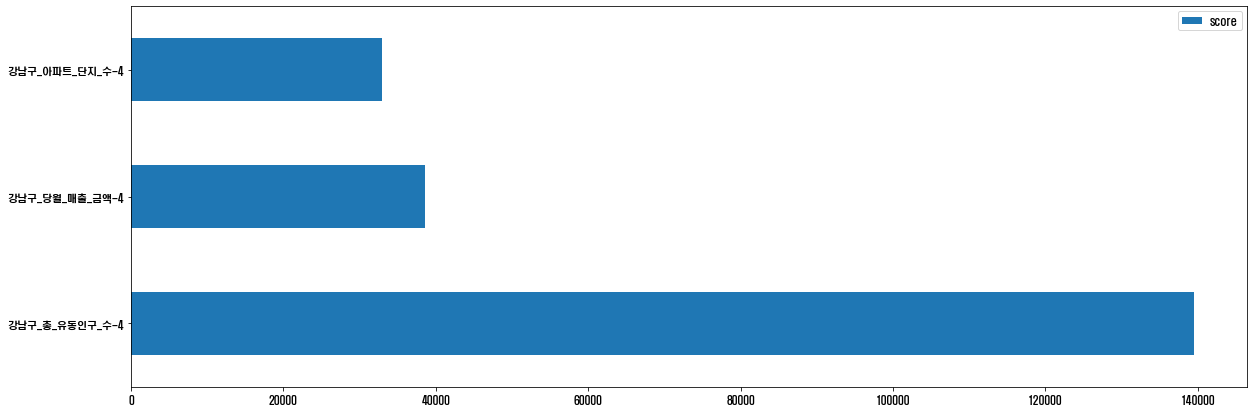

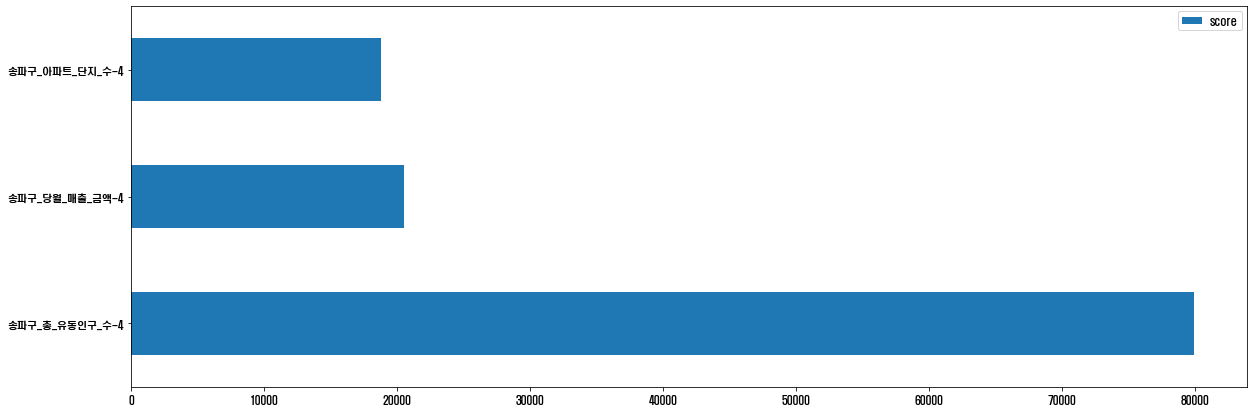

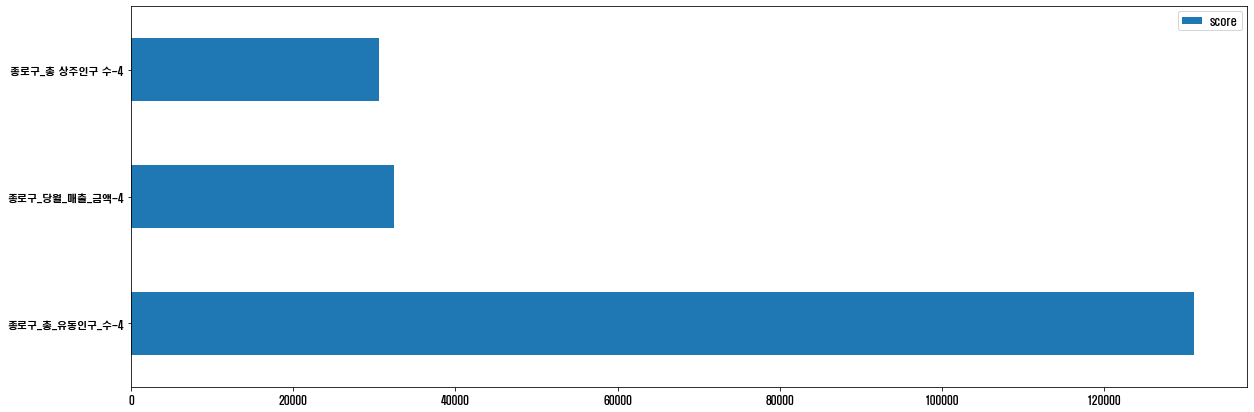

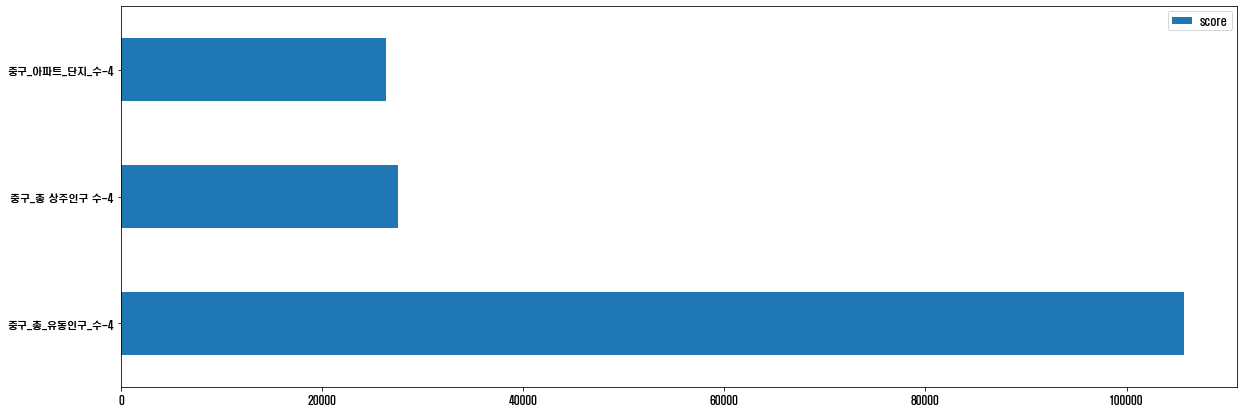

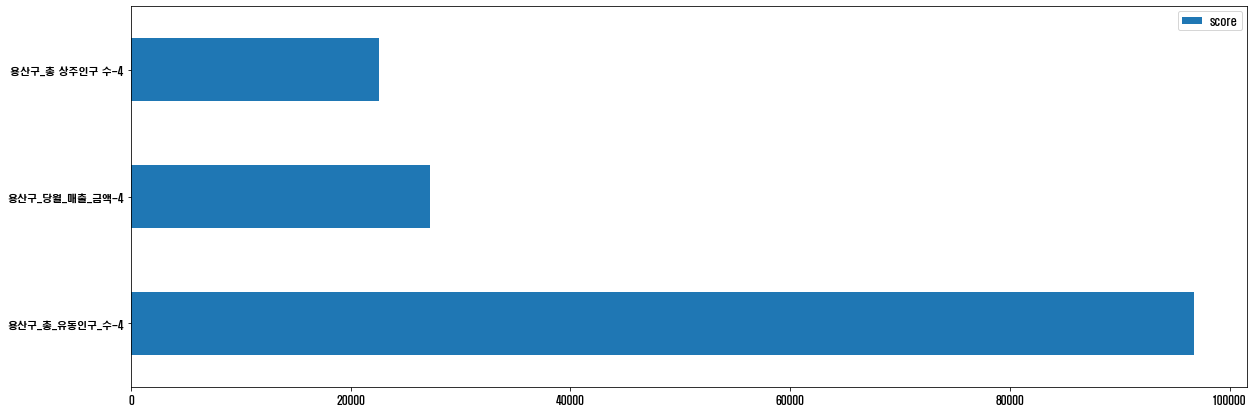

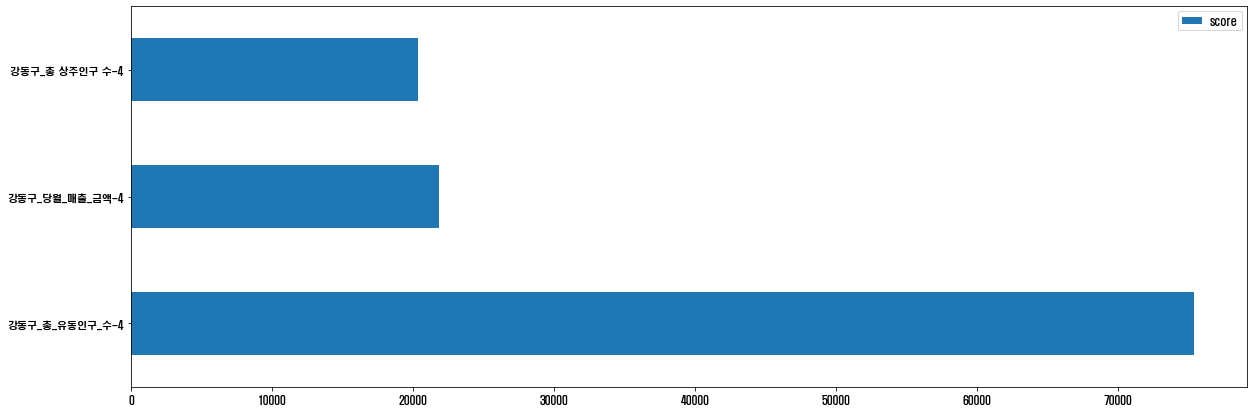

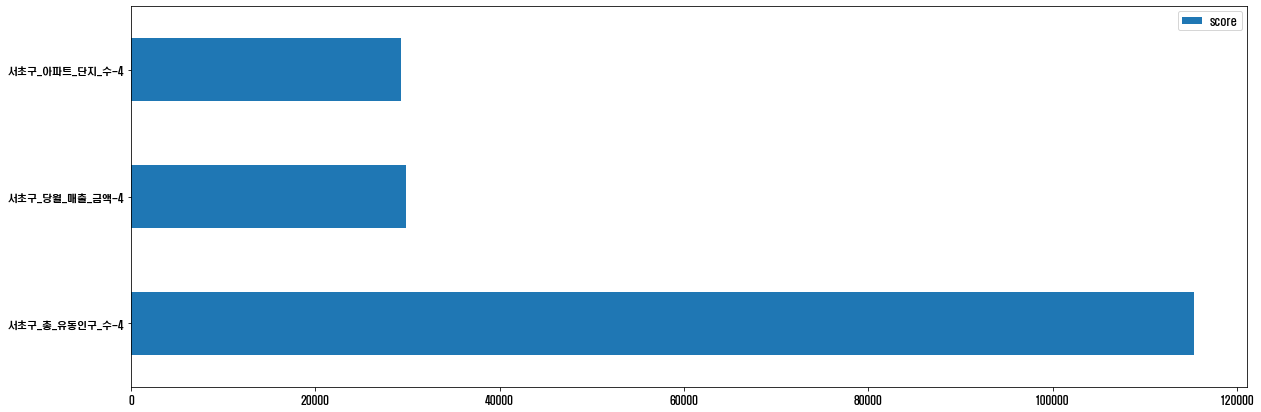

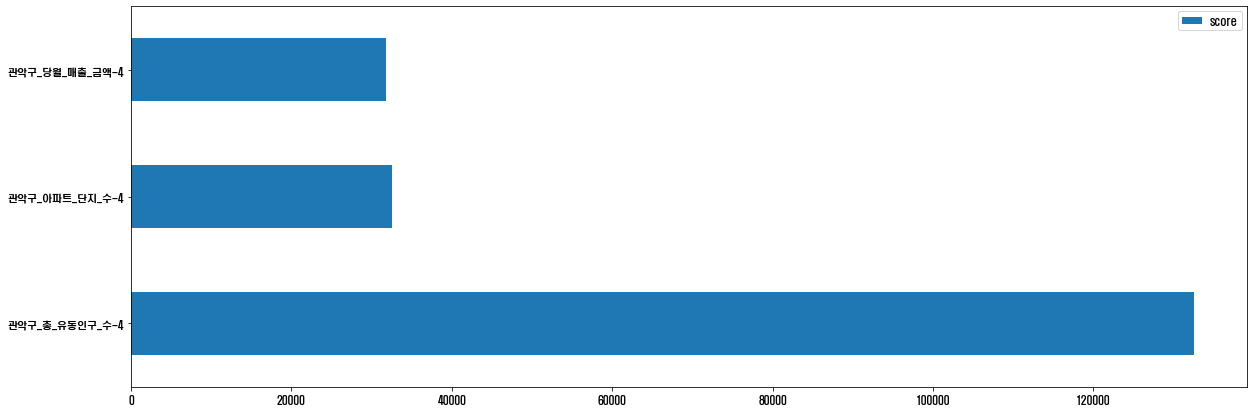

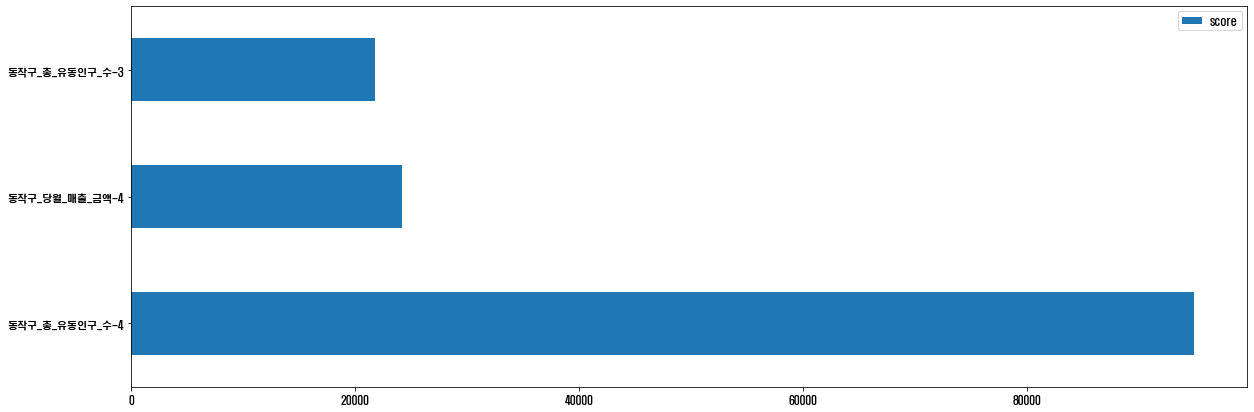

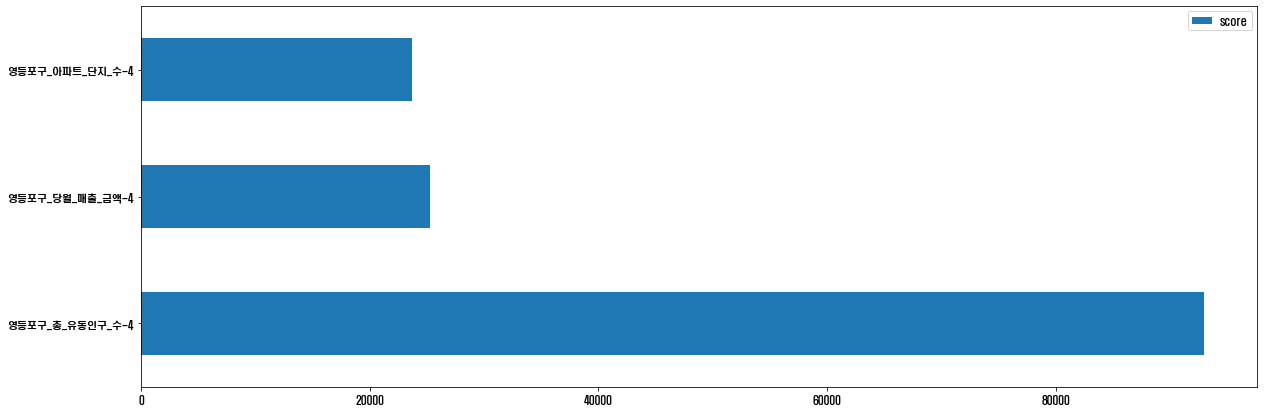

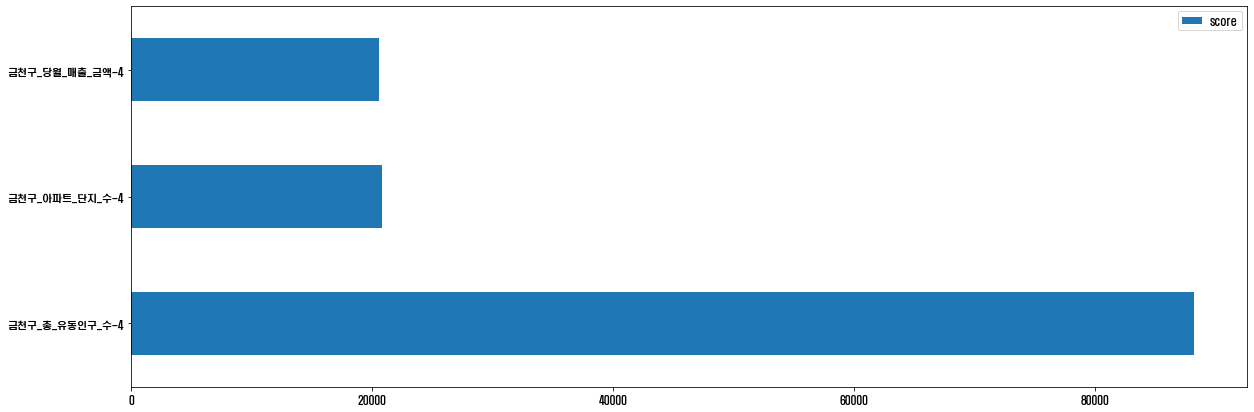

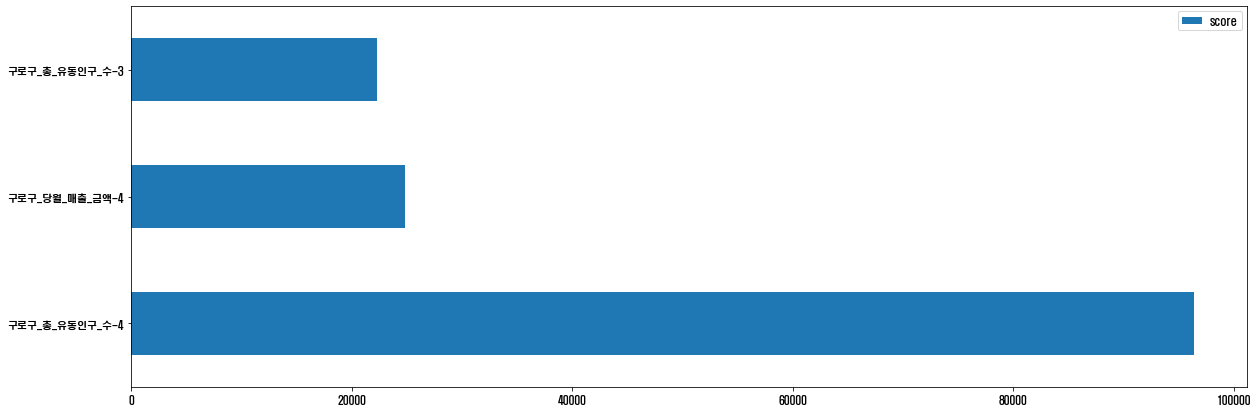

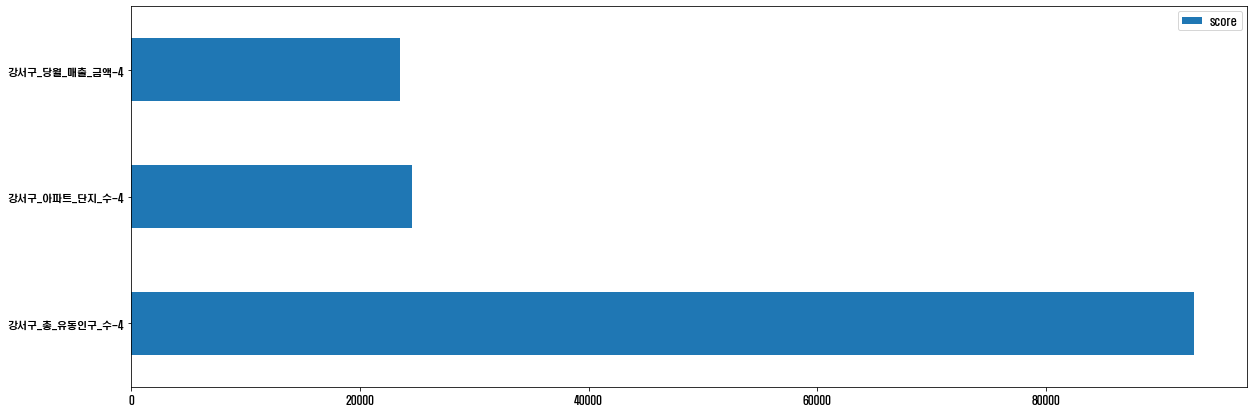

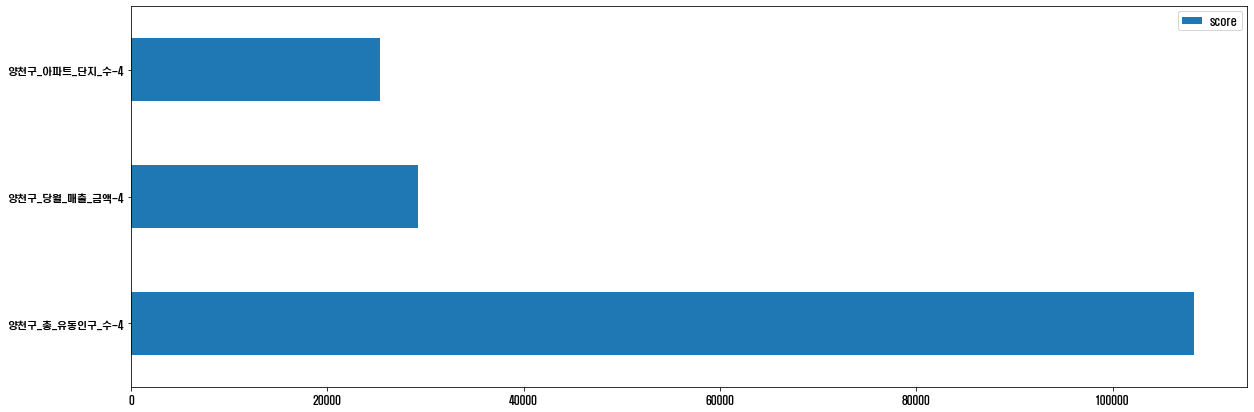

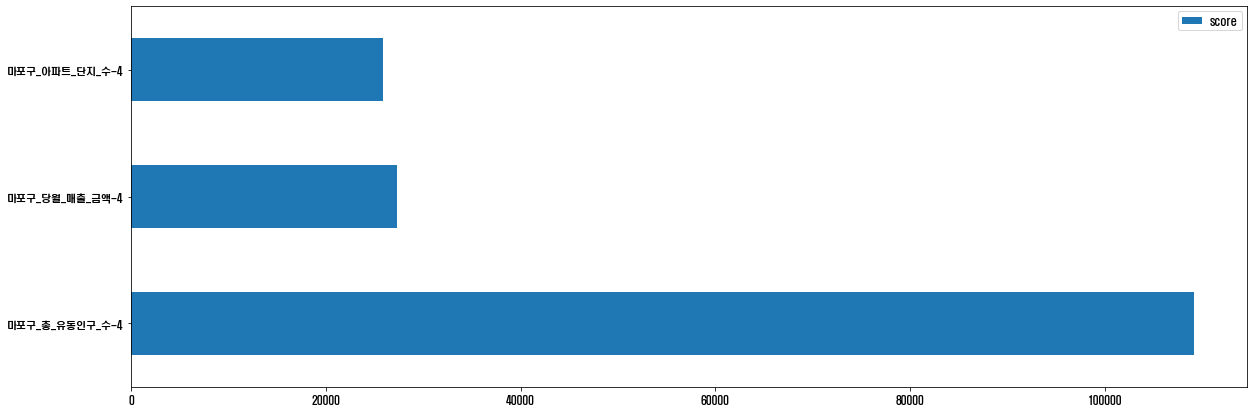

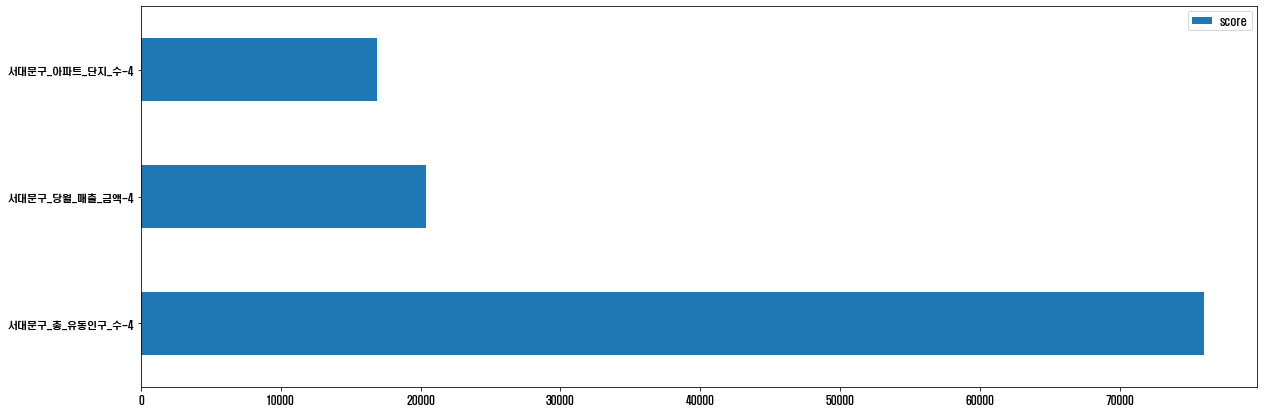

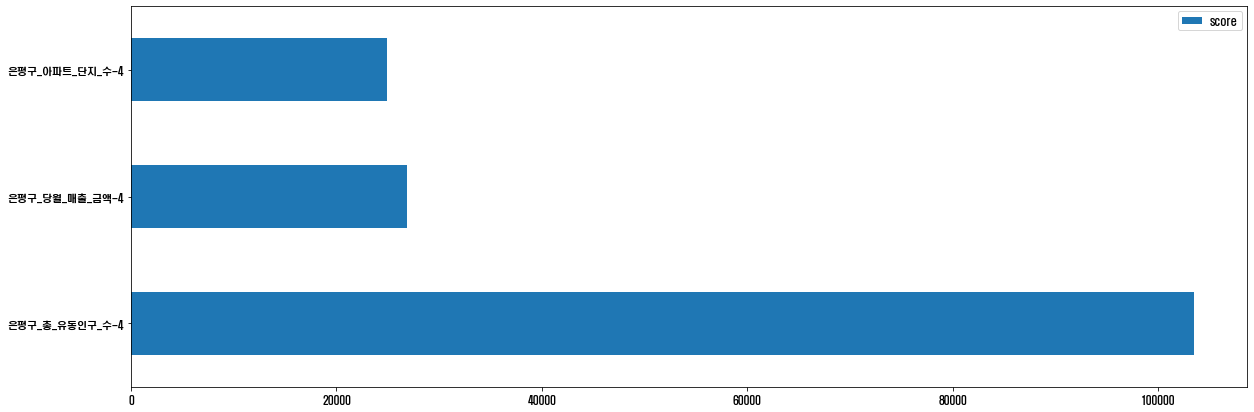

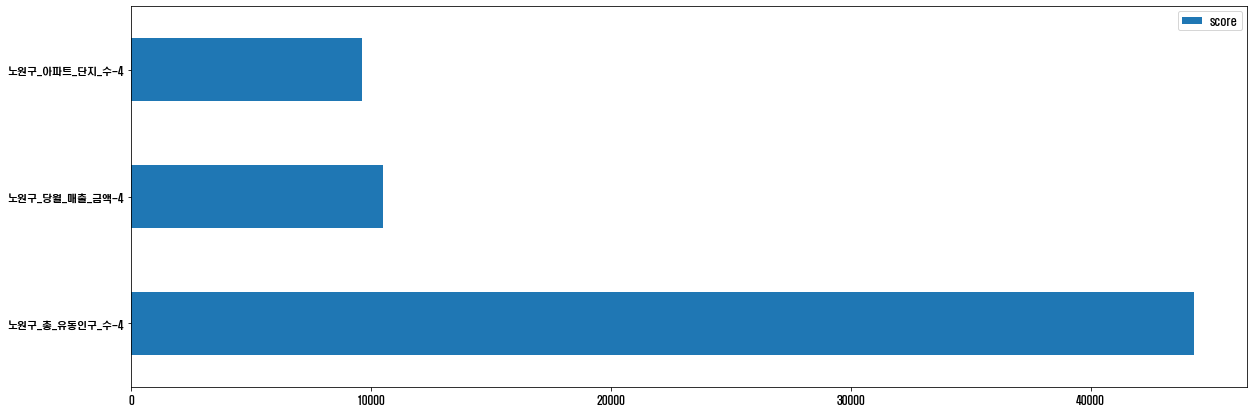

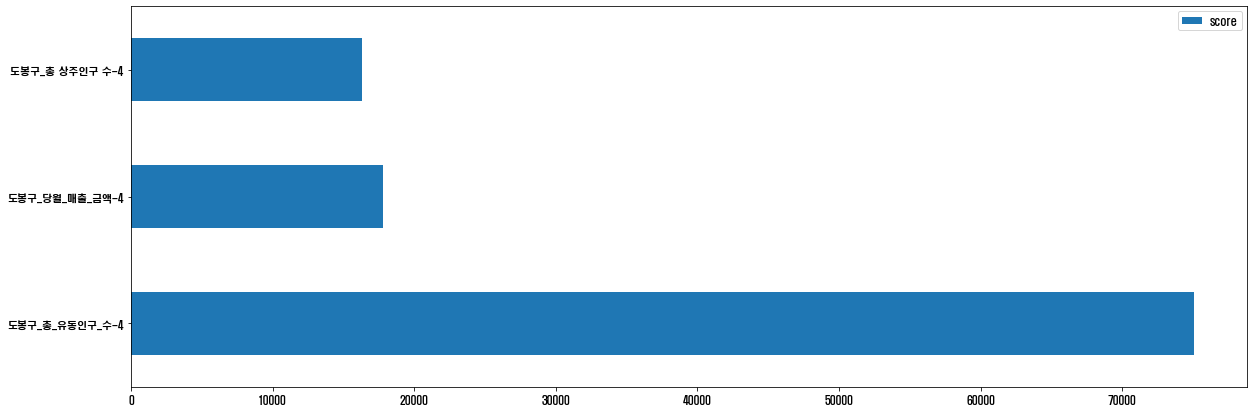

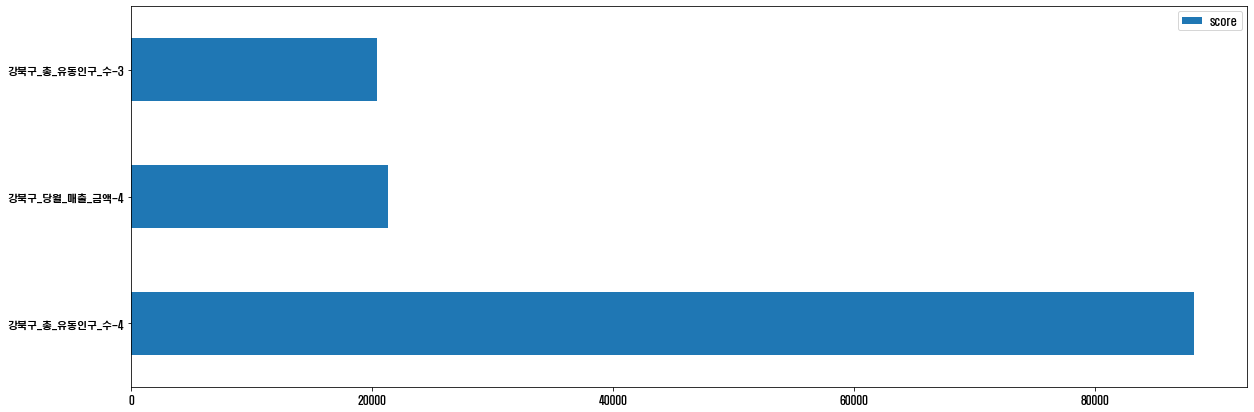

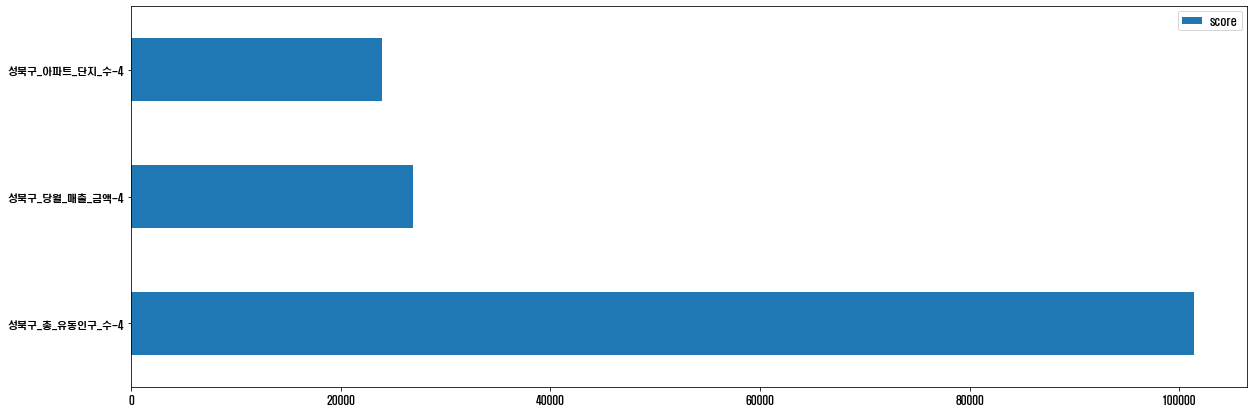

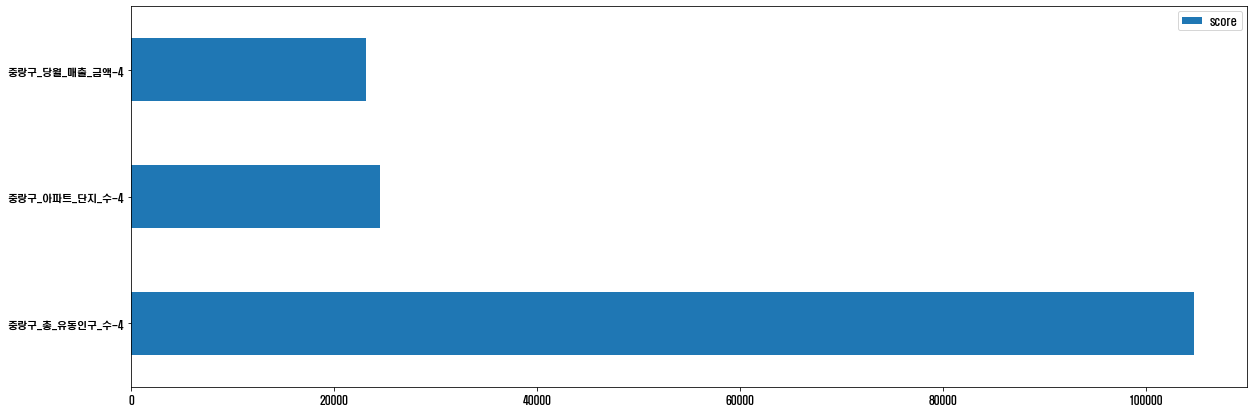

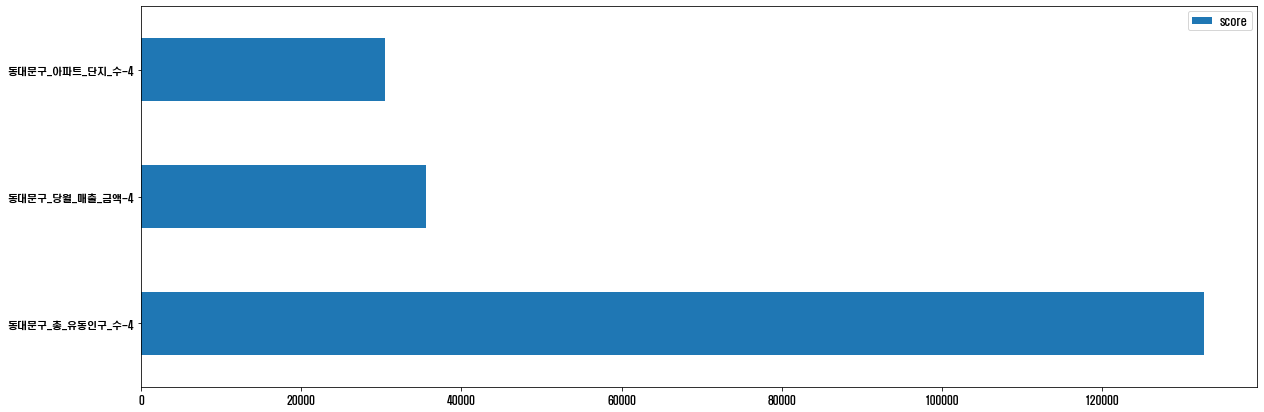

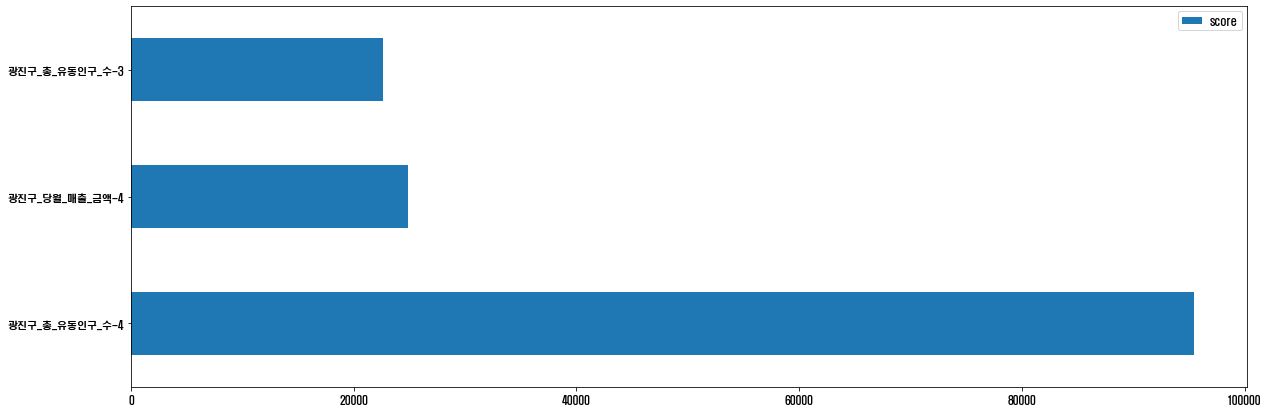

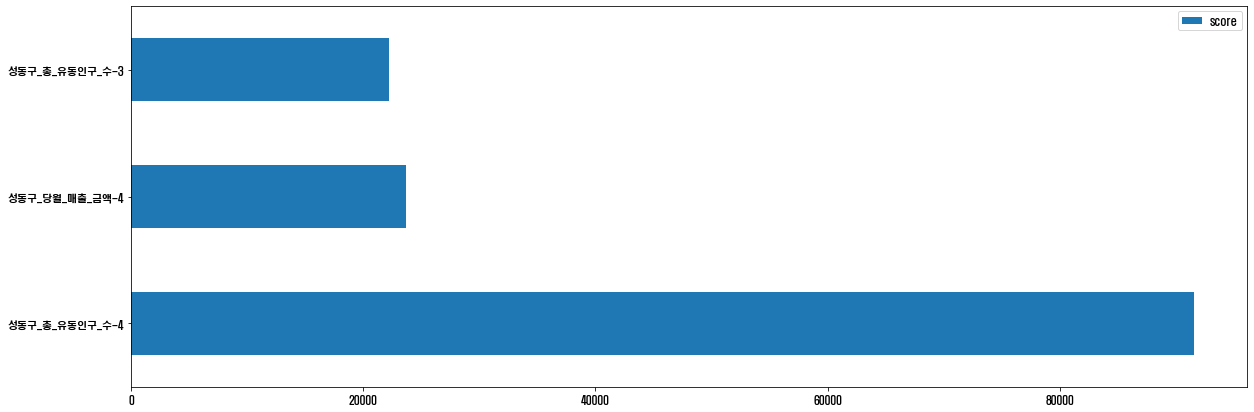

In [53]:
for ad in all_data_c['자치구_명'].unique():
    feature_important = globals()["xgb_3890_{}".format(ad)].get_booster().get_score(importance_type='weight')
    keys = list(feature_important.keys())
    
    # key 값에 지역구 명을 붙인다.
    for i in range(0,len(keys)):
        keys[i] = str(ad)+str('_')+keys[i]
    values = list(feature_important.values())
    plt.rcParams["figure.figsize"] = (20,7)
    data_50 = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
    data_50[:3].plot(kind='barh')

### 반대로 폐업률 Top 1,2,3  별로 어떤 요인이 가장 다수인지 확인한다.

In [54]:
# 
for ad in all_data_c['자치구_명'].unique():
    
    feature_important = globals()["xgb_3890_{}".format(ad)].get_booster().get_score(importance_type='weight')
    keys = list(feature_important.keys())
    
    # key 값에 지역구 명을 붙인다.
    for i in range(0,len(keys)):
        keys[i] = str(ad)+str('_')+keys[i]
    values = list(feature_important.values())
    plt.rcParams["figure.figsize"] = (20,7)
    globals()["xgb_weight_{}".format(ad)] = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
    
    

(0, 140000)

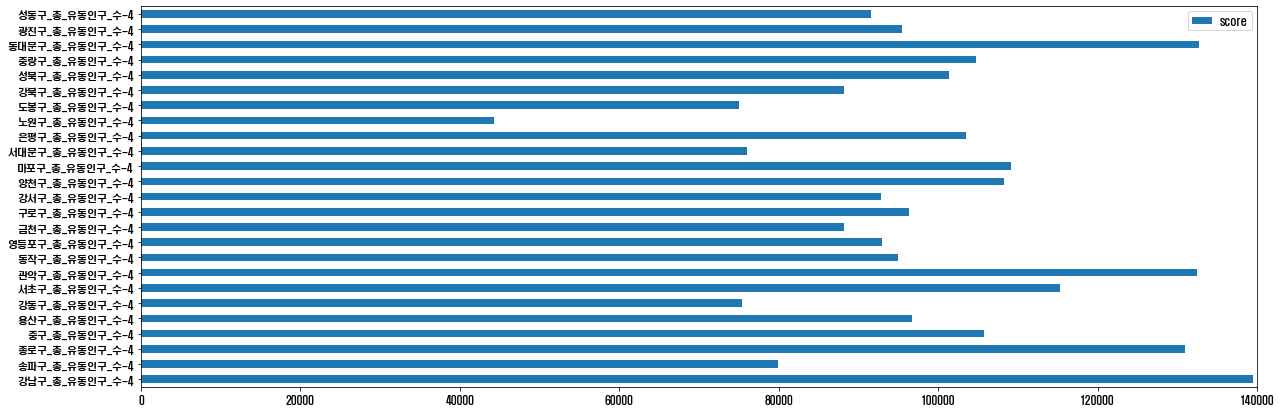

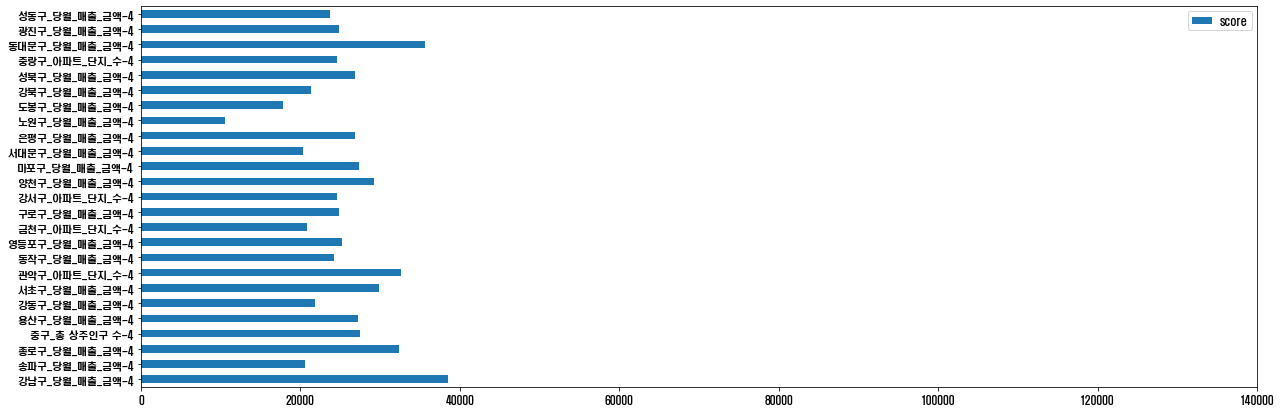

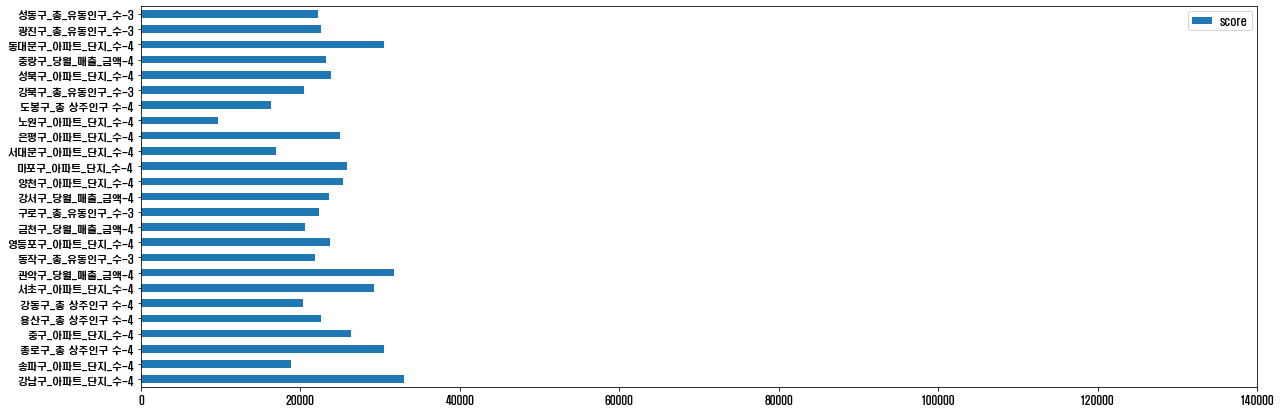

In [58]:

ranking_1 = pd.DataFrame()
ranking_2 = pd.DataFrame()
ranking_3 = pd.DataFrame()

for ad in all_data_c['자치구_명'].unique():
    ranking_1 = ranking_1.append(globals()["xgb_weight_{}".format(ad)][:1], ignore_index=False)
    ranking_2 = ranking_2.append(globals()["xgb_weight_{}".format(ad)][1:2], ignore_index=False)
    ranking_3 = ranking_3.append(globals()["xgb_weight_{}".format(ad)][2:3], ignore_index=False)
    
ranking_1.plot(kind='barh').set_xlim(0,140000)
ranking_2.plot(kind='barh').set_xlim(0,140000)
ranking_3.plot(kind='barh').set_xlim(0,140000)


########### 강남구 ###########


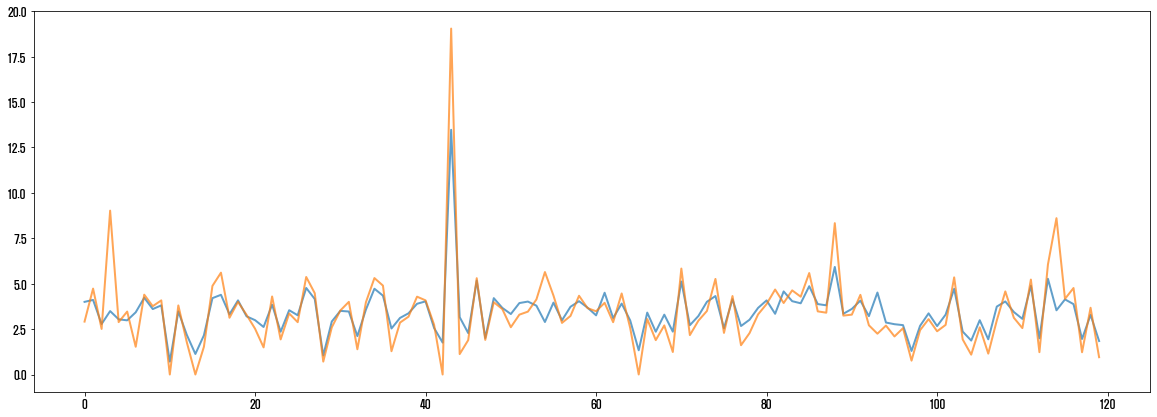




########### 송파구 ###########


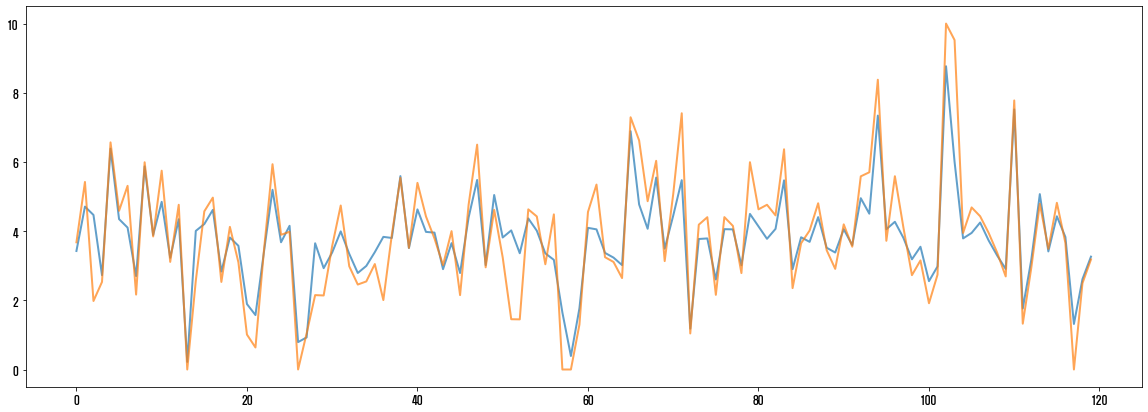




########### 종로구 ###########


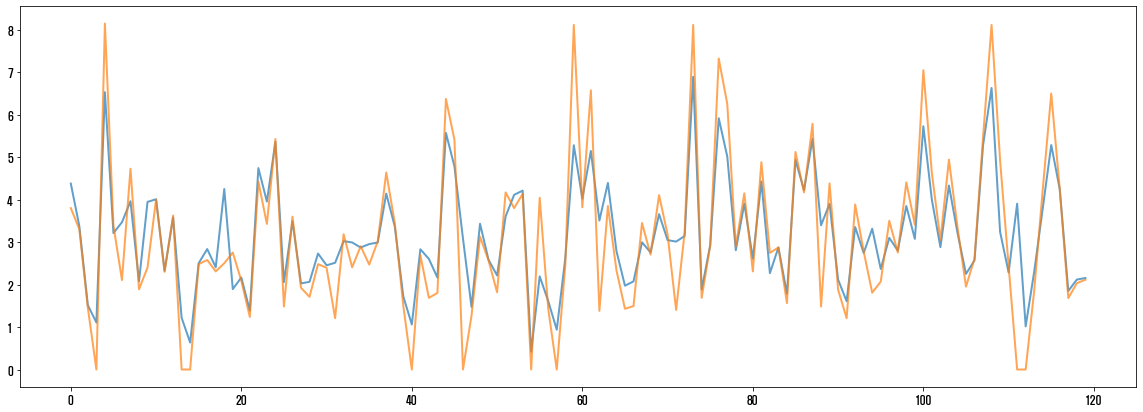




########### 중구 ###########


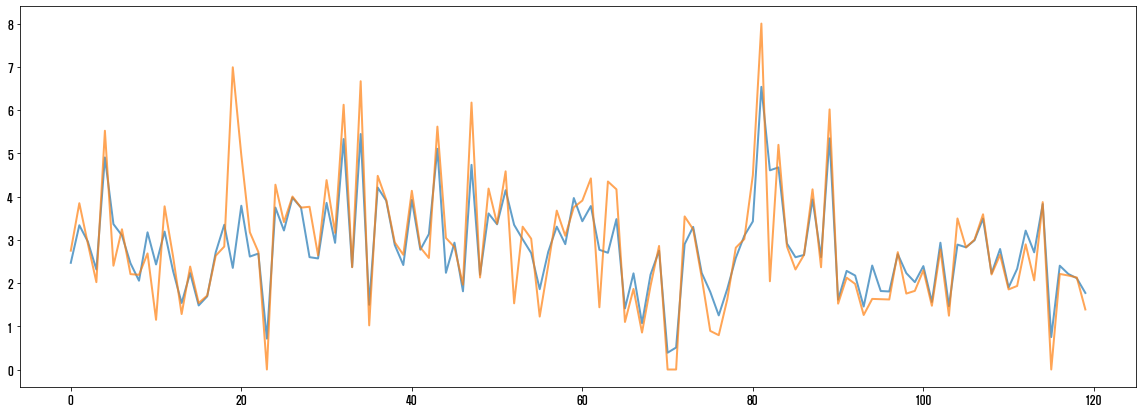




########### 용산구 ###########


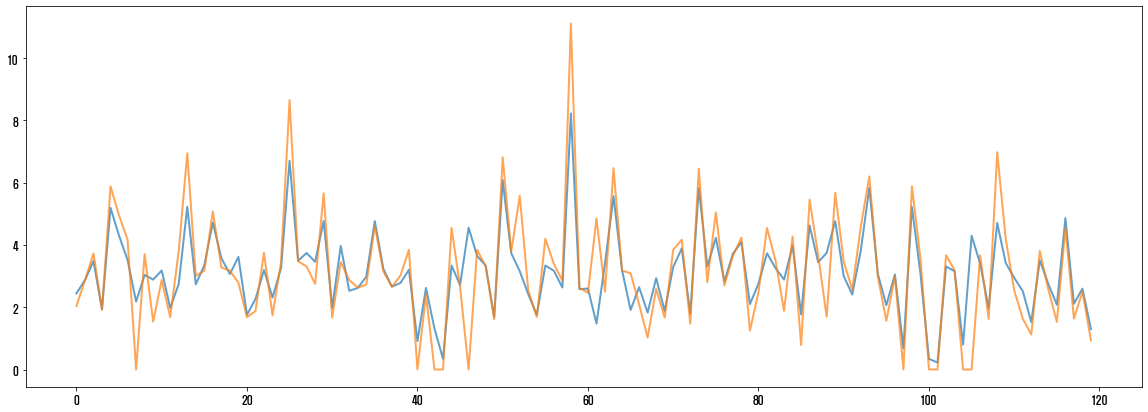




########### 강동구 ###########


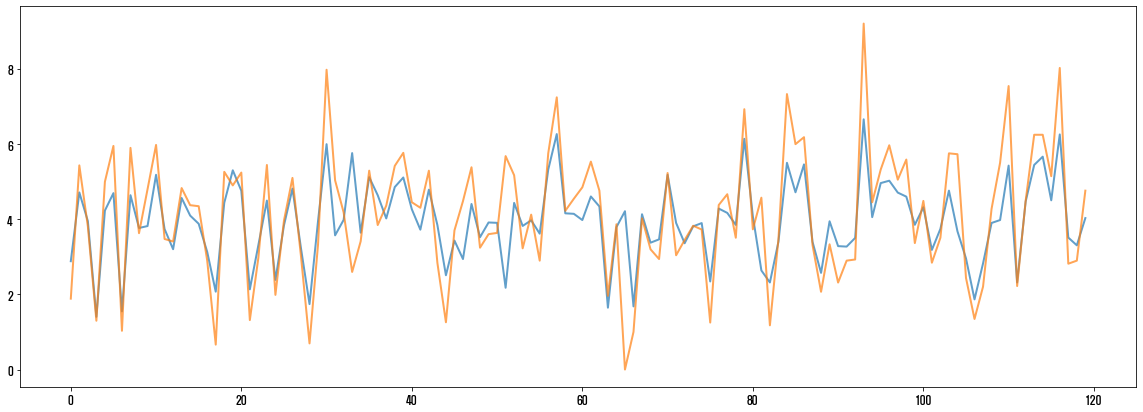




########### 서초구 ###########


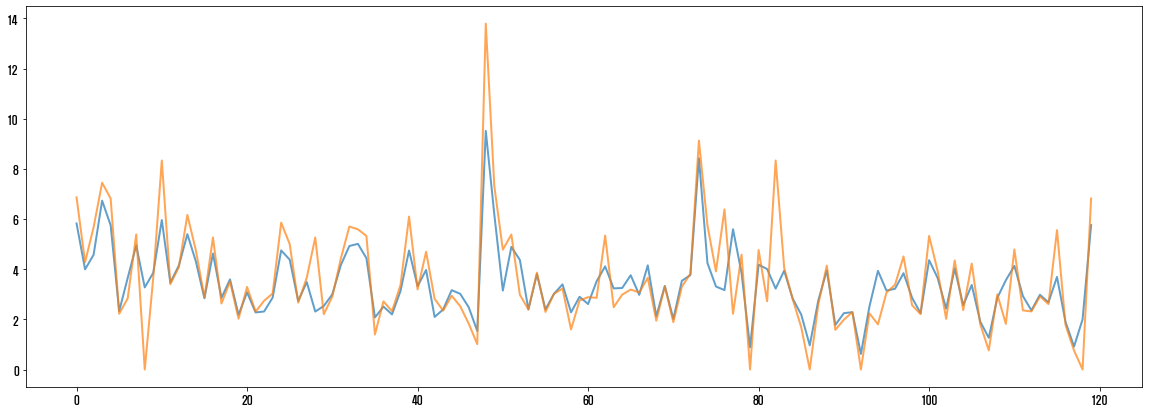




########### 관악구 ###########


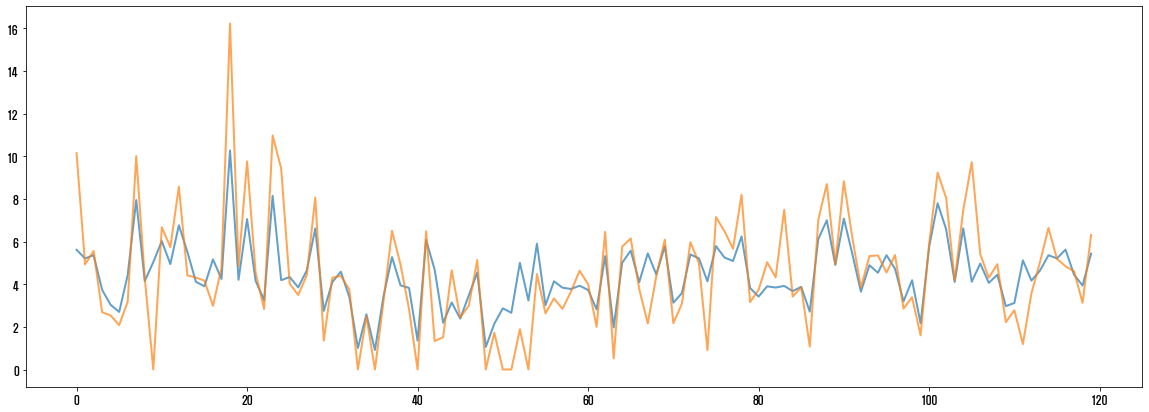




########### 동작구 ###########


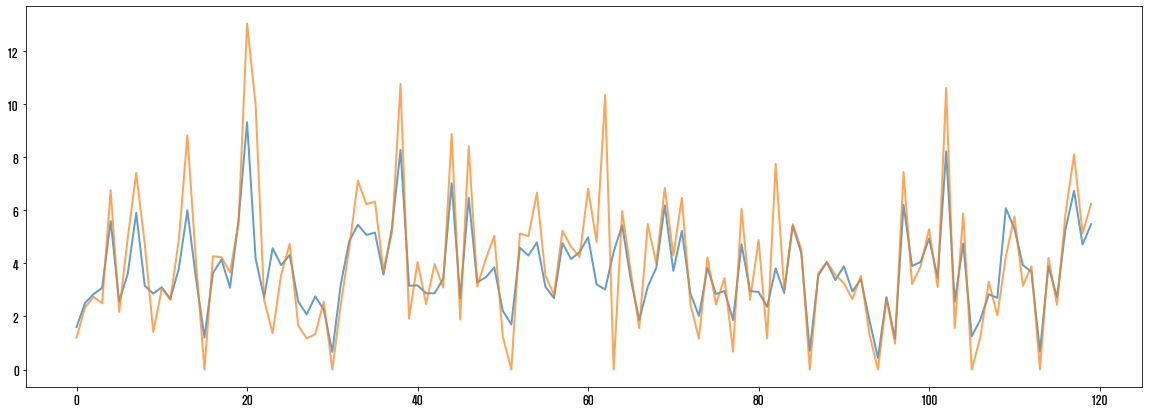




########### 영등포구 ###########


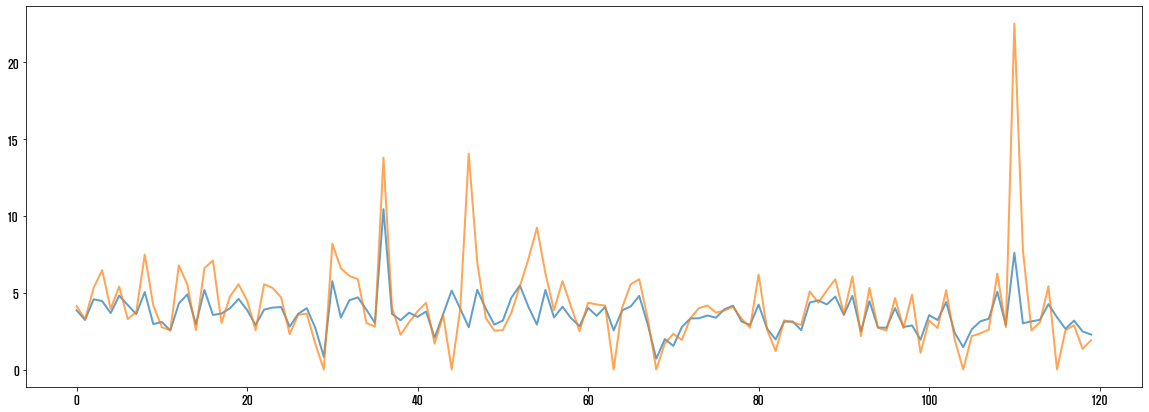




########### 금천구 ###########


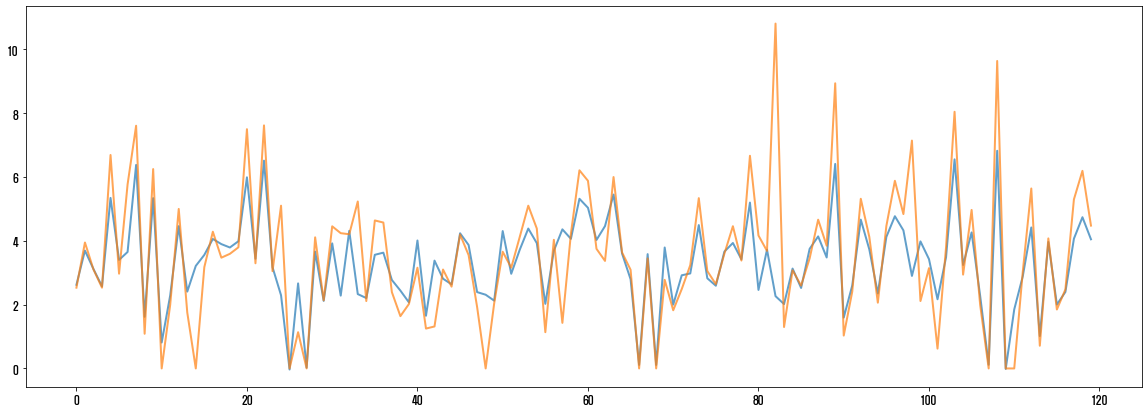




########### 구로구 ###########


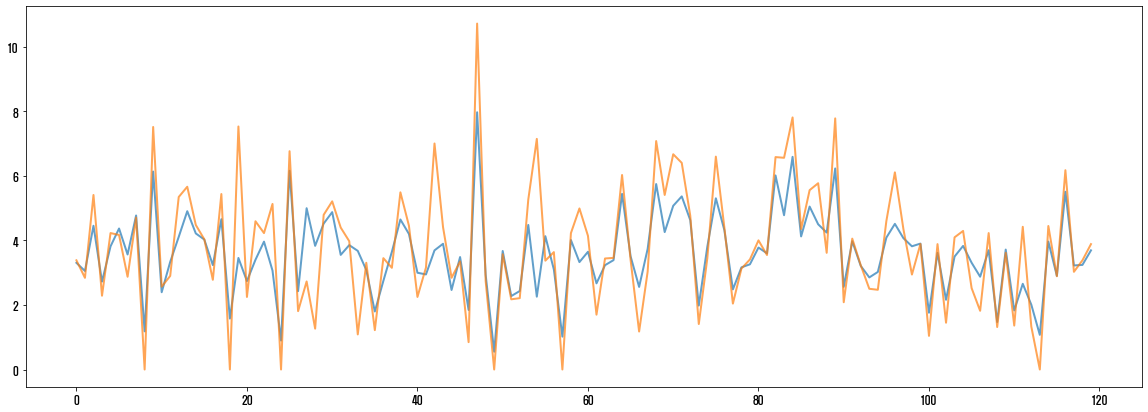




########### 강서구 ###########


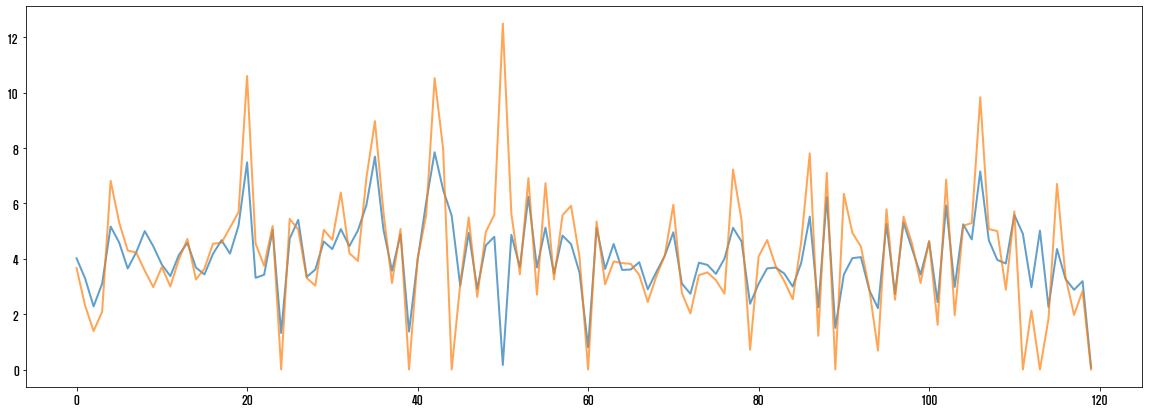




########### 양천구 ###########


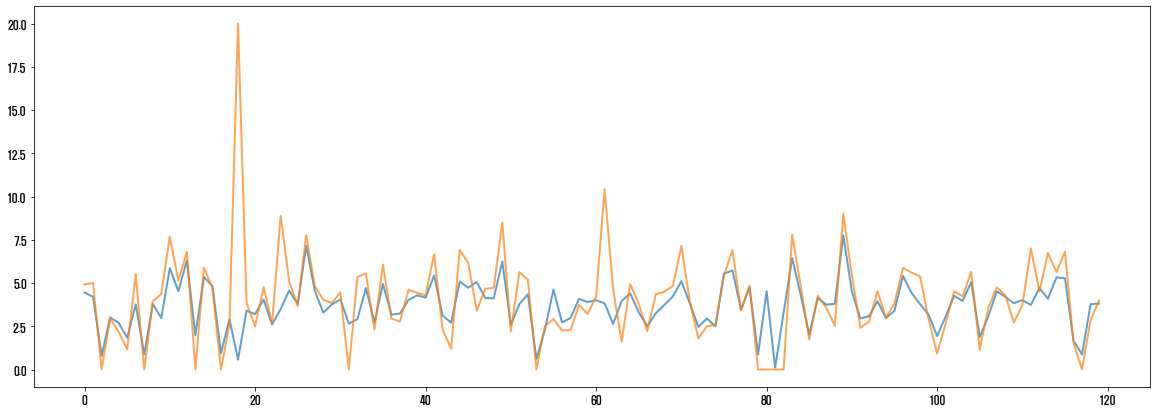




########### 마포구 ###########


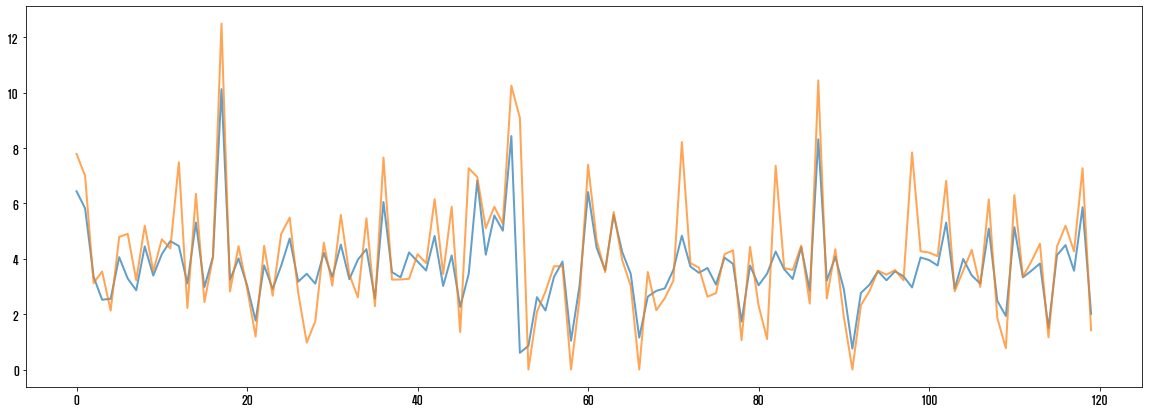




########### 서대문구 ###########


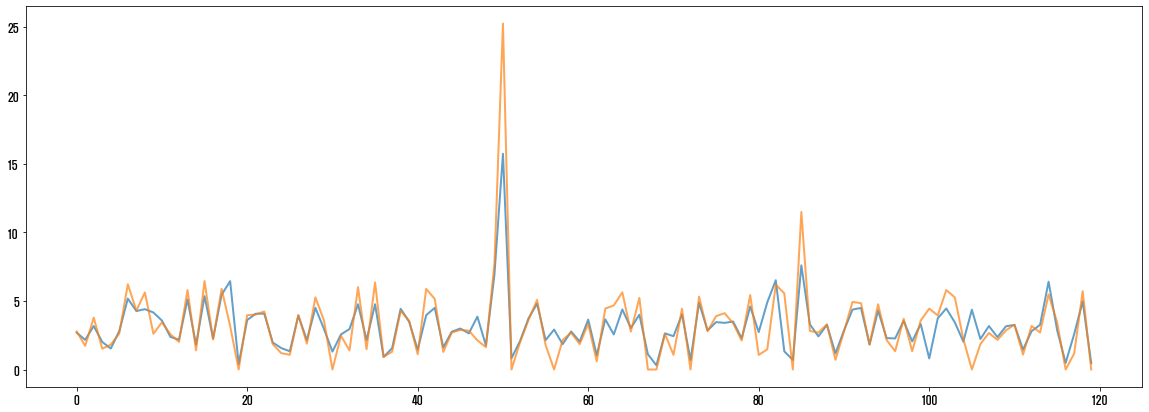




########### 은평구 ###########


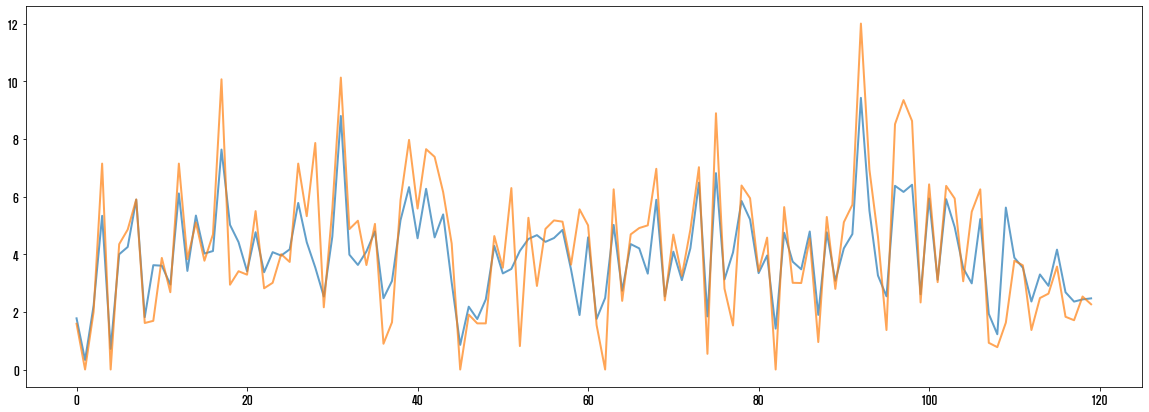




########### 노원구 ###########


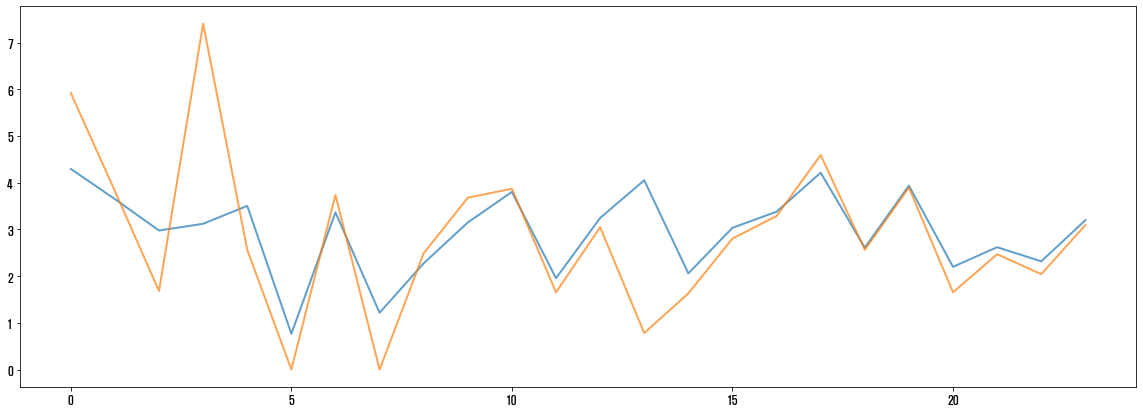




########### 도봉구 ###########


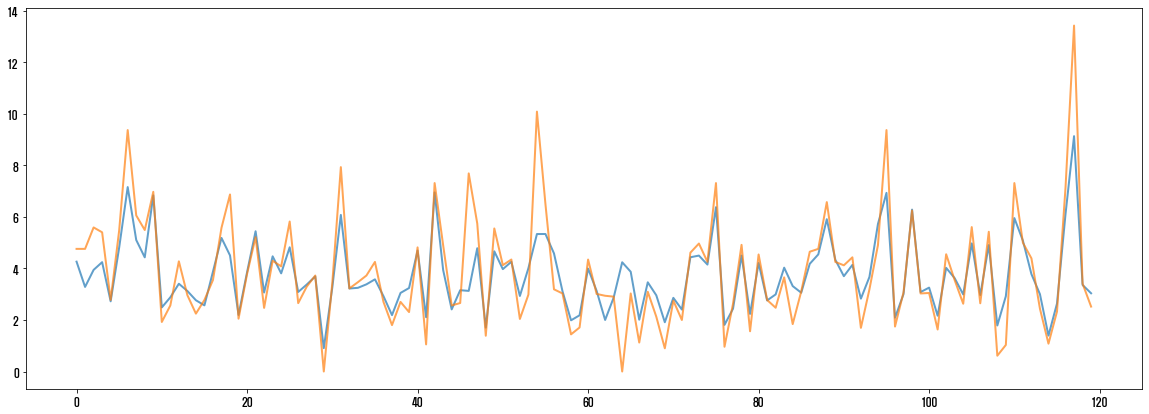




########### 강북구 ###########


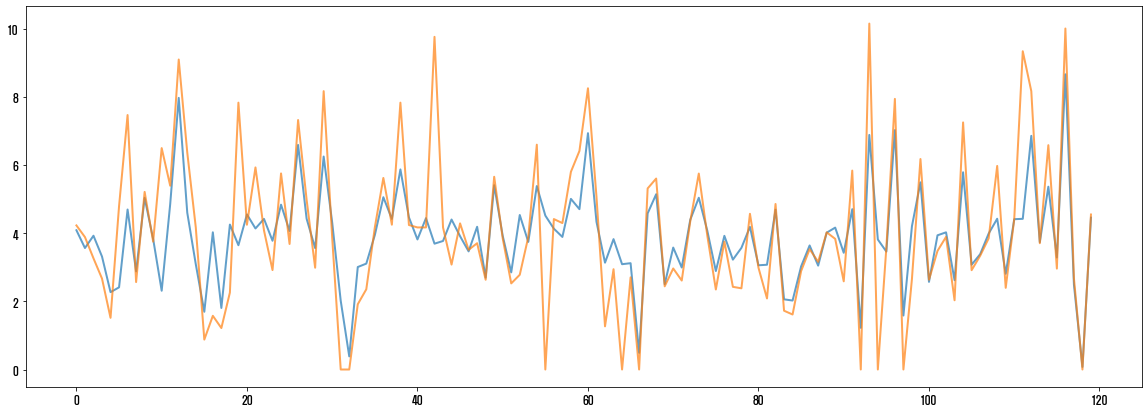




########### 성북구 ###########


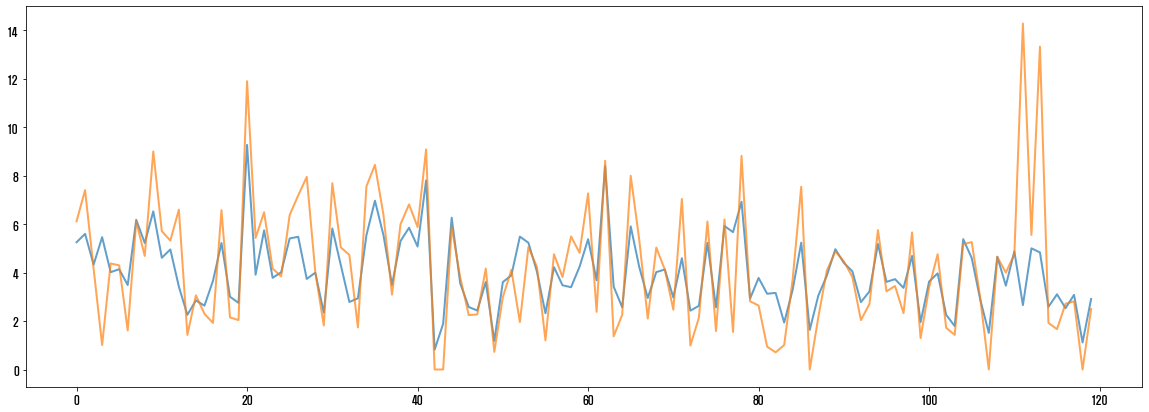




########### 중랑구 ###########


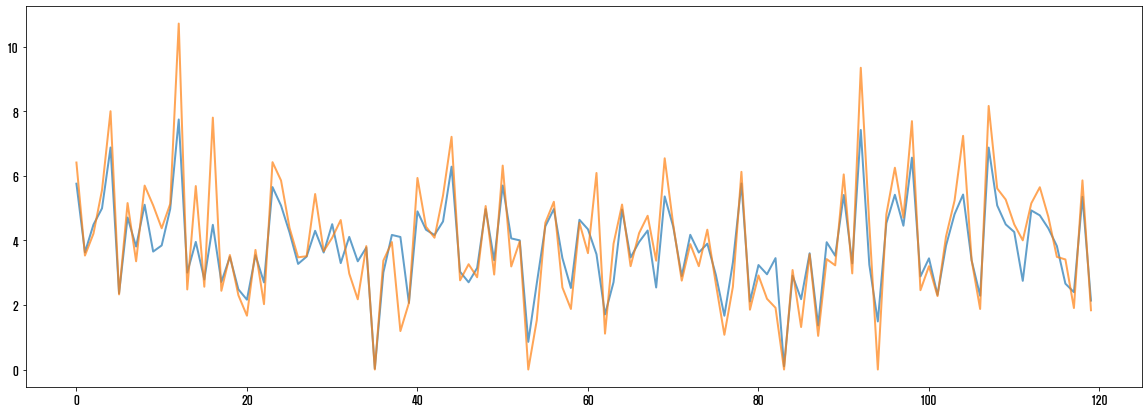




########### 동대문구 ###########


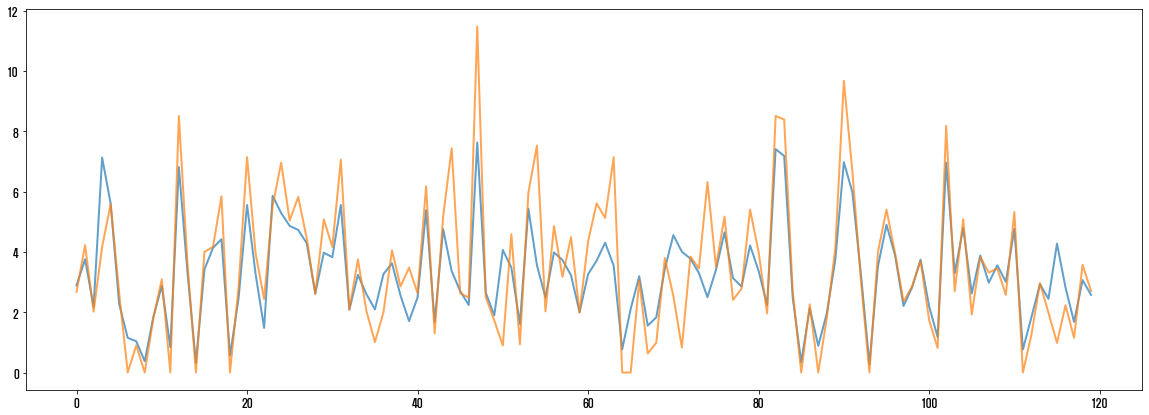




########### 광진구 ###########


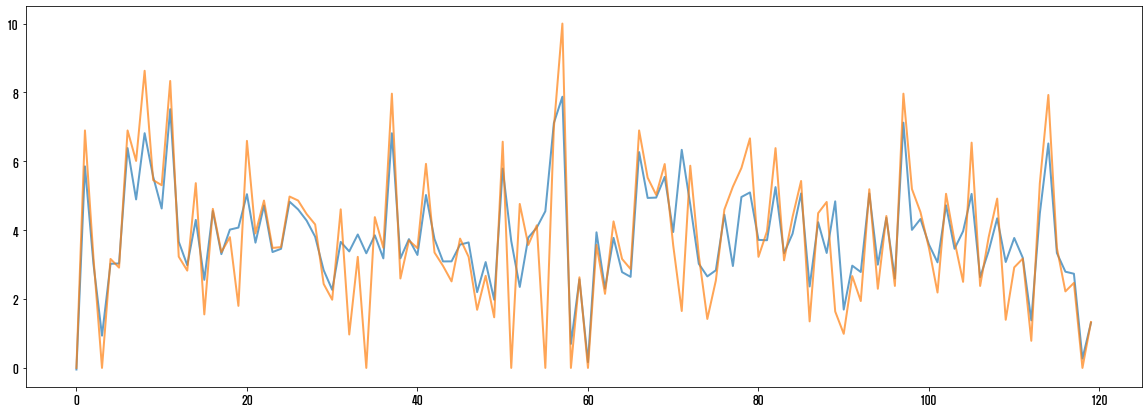




########### 성동구 ###########


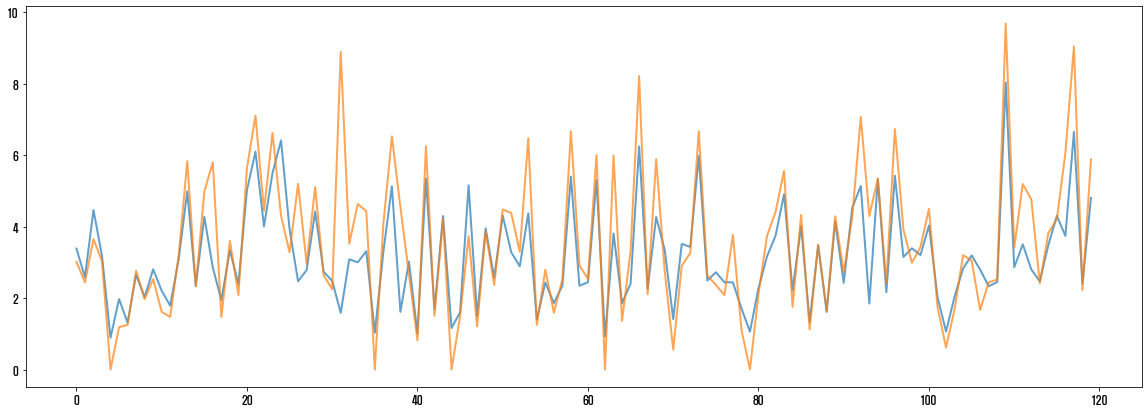

In [59]:
# 
for ad in all_data_c['자치구_명'].unique():
    print('###########',ad,'###########')
    plt.pyplot.plot(
        globals()["xgb_3890_{}".format(ad)].predict(globals()["x_in_{}".format(ad)].astype({'상권_코드': 'int32'}))[300:420],
        alpha = 0.7,
        linewidth = 2)
    plt.pyplot.plot(
        globals()["x_out_{}".format(ad)].values[300:420],
        alpha = 0.7,
        linewidth = 2)
    plt.pyplot.show()
    print('\n\n')
# 파란색 : 예측값
# 주황색 : 실제값
# 갈색 : 파란색과 주황색이 겹치는 부분


